In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display
from pandas_ml import ConfusionMatrix
import operator
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

sns.set()
% matplotlib inline

In [2]:
# Overall Plan:
# Perform EDA to determine data quality (missing values, outliers, etc.)
# Drop values that will not help: Id, Soil_Type7, and Soil_Type15
# Use cross-validation to find best baseline model
# Iterate with dropping features or engineering features on baseline model
# Use cross-validation to tune hyperparameters and find best overall model

In [3]:
# Looks like all values of Soil_Type7 and Soil_Type15 are 0
# Take them out

In [4]:
# Drop Id feature
# Need to normalize/standardize features?

# Import and EDA

In [5]:
train = pd.read_csv('data/train.csv')
pd.set_option('display.max_columns', len(train))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [7]:
train.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count   15120.000000                        15120.000000      15120.000000   
mean      135.091997                         1511.147288          0.237897   
std        45.895189                         1099.936493          0.425810   
min         0.000000                            0.000000          0.000000   
25%       106.000000                          730.000000          0.000000   
50%       138.000000                         1256.000000          0.000000   
75%       167.000000                         1988.250000          0.000000   
max       248.000000                         6993.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4    Soil_Type1  \
count      15120.000000      15120.000000      15120.000000  15120.000000   
mean           0.033003          0.419907          0.309193      0.023479   
std            0.178649          0.493560          0.462176      0.151424   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000      0.000000   
50%            0.000000          0.000000          0.000000      0.000000   
75%            0.000000          1.000000          1.000000      0.000000   
max            1.000000          1.000000          1.000000      1.000000   

         Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5    Soil_Type6  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.041204      0.063624      0.055754      0.010913      0.042989   
std        0.198768      0.244091      0.229454      0.103896      0.202840   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000 

In [8]:
train.drop(['Id', 'Soil_Type7', 'Soil_Type15'], axis=1, inplace=True)

In [9]:
train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type8  Soil_Type9  Soil_Type10  \
0           0           0           0           0           0            0   
1           0           0           0           0           0            0   
2           0           0           0           0           0            0   
3           0           0           0           0           0            0   
4           0           0           0           0           0            0   

   Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type16  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            1            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type22  Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  \
0            0            0            1            0            0   
1            0            0            1            0            0   
2            0  

In [10]:
# Are there any missing values?

num_full = []
for column in train.columns:
    missing = len(train[train[column].isnull() == True])
    if missing != 0:
        print('Missing values in {}: {}'.format(column, missing))
    else:
        num_full.append(missing)
        
if len(num_full) == len(train.columns):
    print('No missing values.')

No missing values.


In [11]:
# What is the distribution of the target class?
pd.DataFrame(train['Cover_Type'].value_counts())

Cover_Type
7        2160
6        2160
5        2160
4        2160
3        2160
2        2160
1        2160

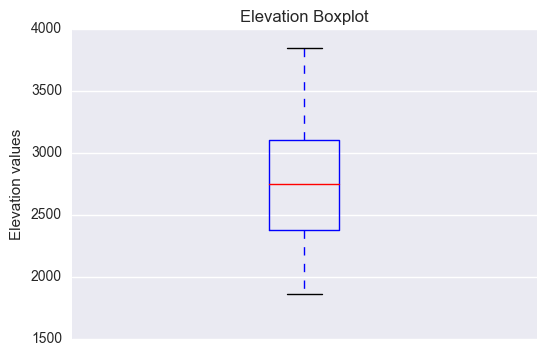

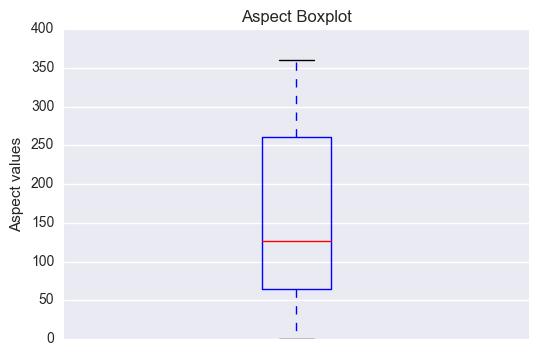

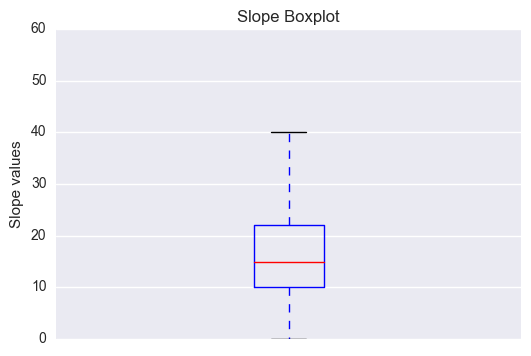

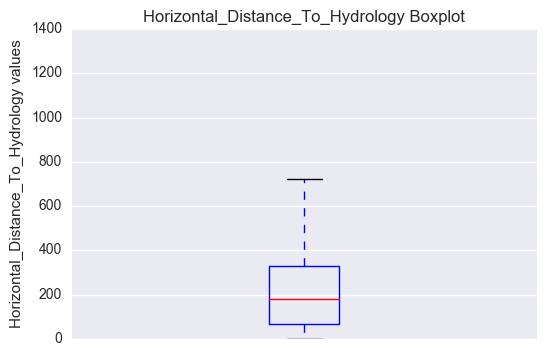

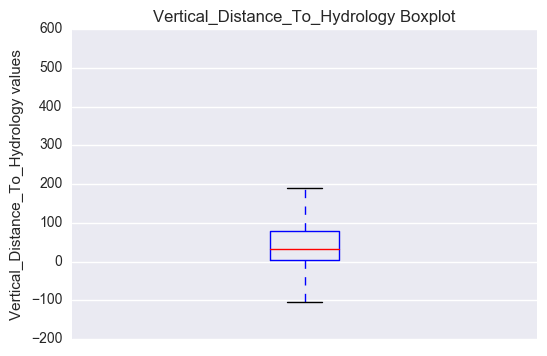

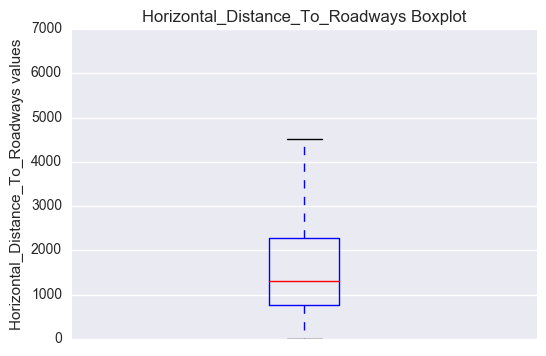

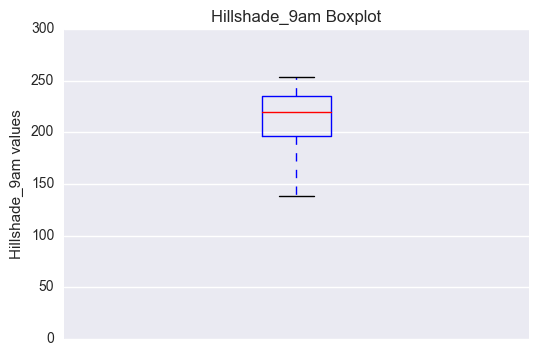

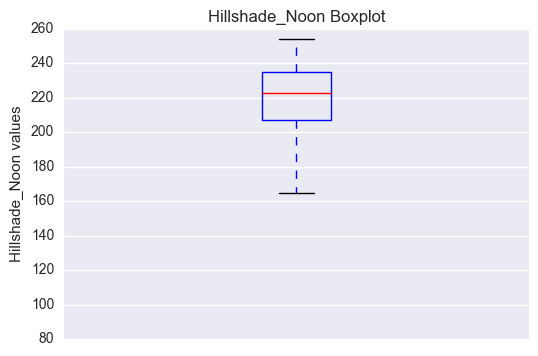

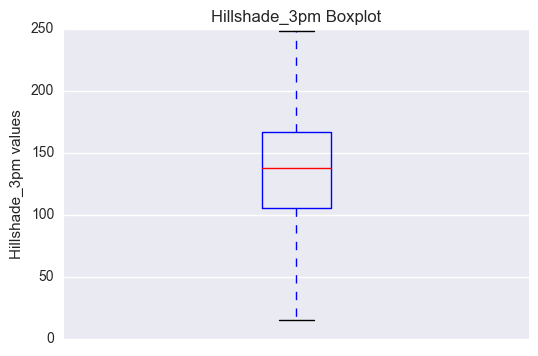

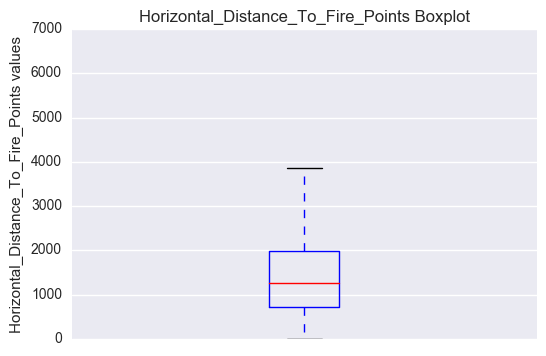

In [13]:
# Are there any outliers?
subset_train = train[['Elevation', 'Aspect', 'Slope', 
                      'Horizontal_Distance_To_Hydrology', 
                      'Vertical_Distance_To_Hydrology', 
                      'Horizontal_Distance_To_Roadways', 
                      'Hillshade_9am', 'Hillshade_Noon', 
                      'Hillshade_3pm', 
                      'Horizontal_Distance_To_Fire_Points']]

for feature in subset_train:
    plt.boxplot(subset_train[feature])
    plt.title('{} Boxplot'.format(feature))
    plt.ylabel('{} values'.format(feature))
    plt.xticks([])
    plt.show();

/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


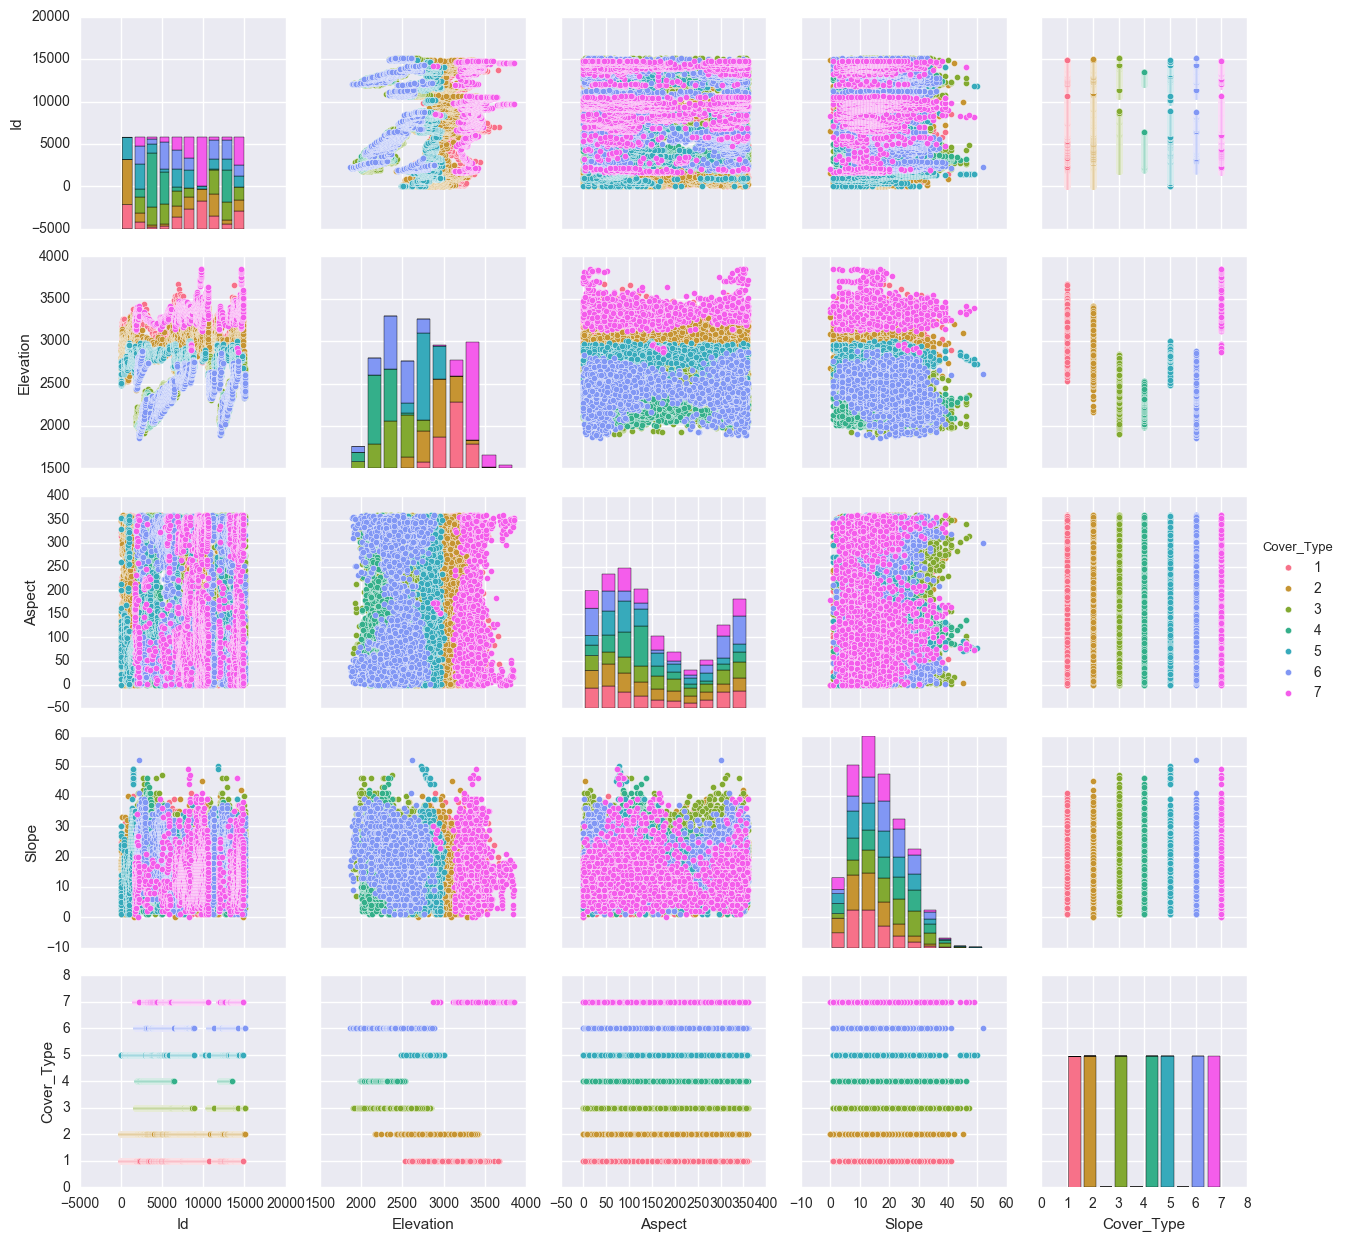

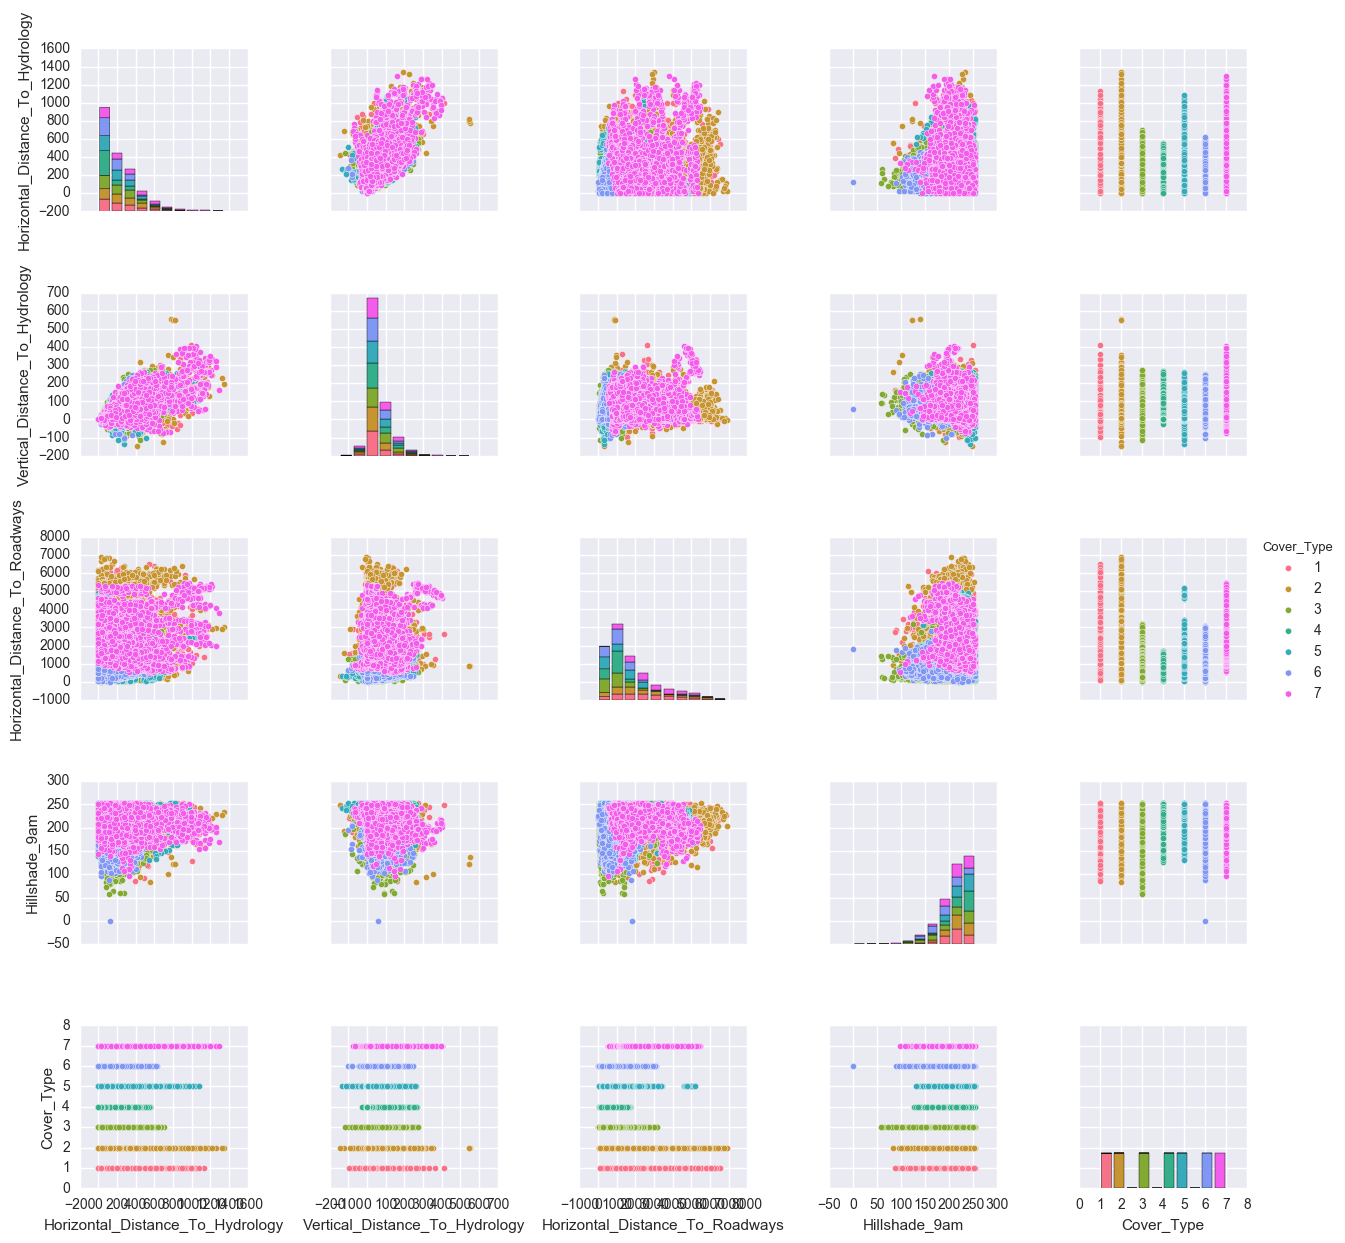

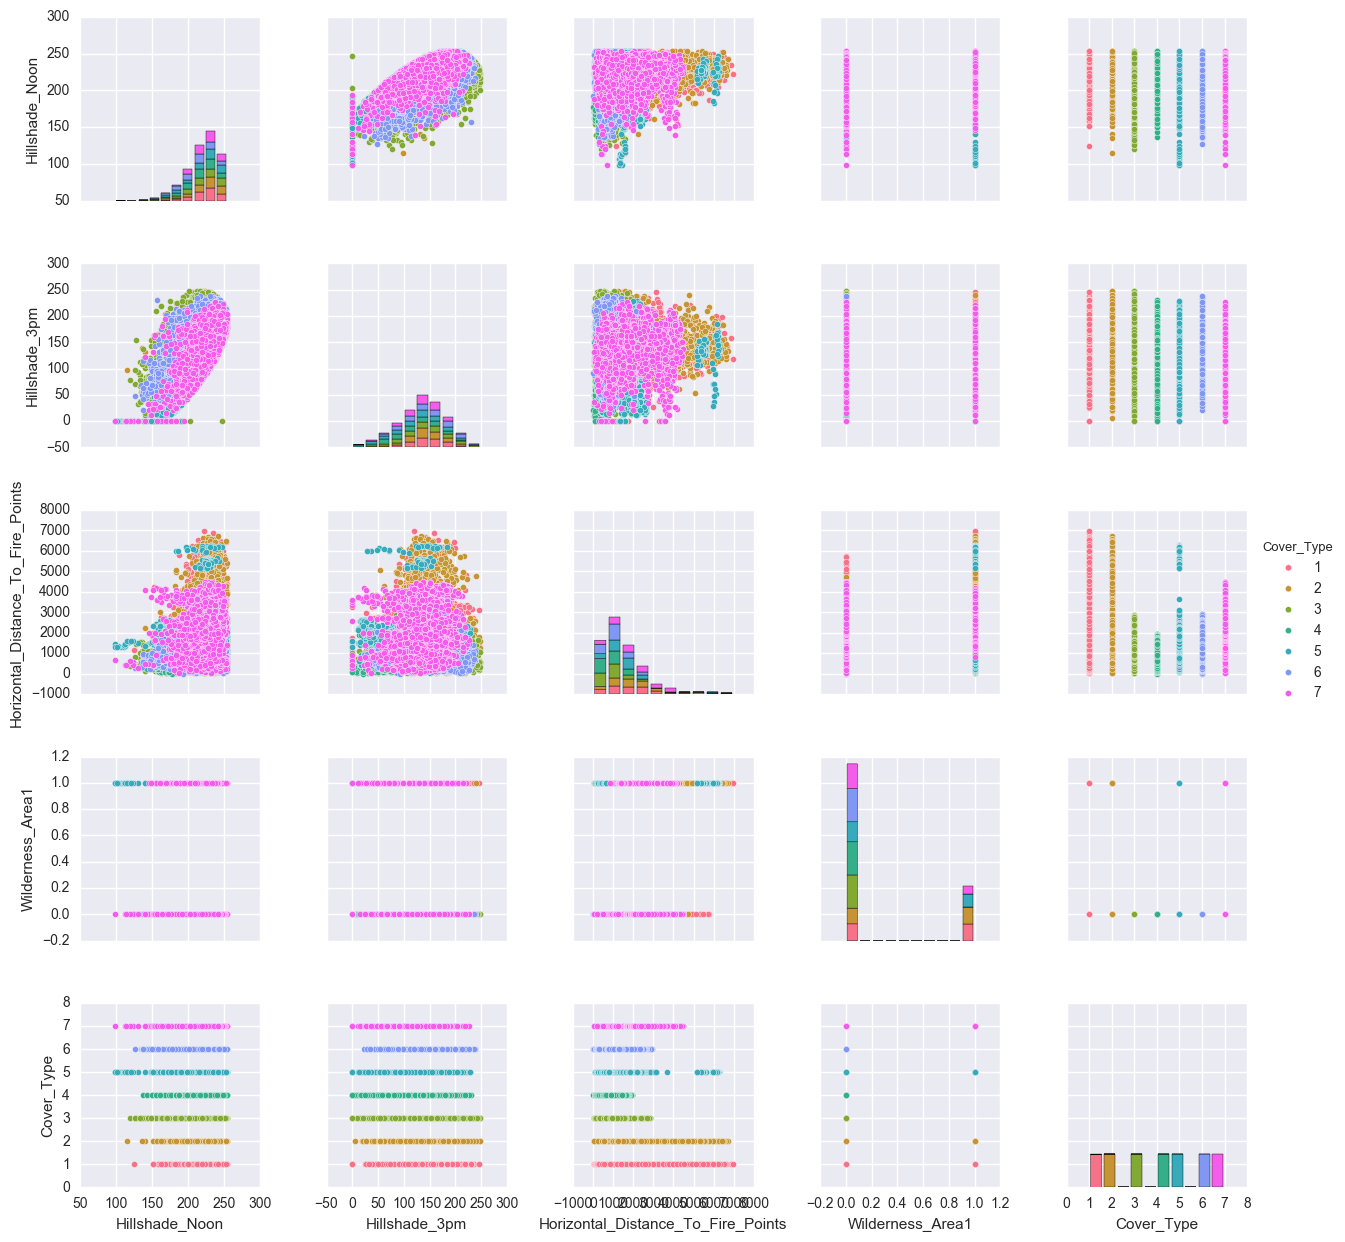

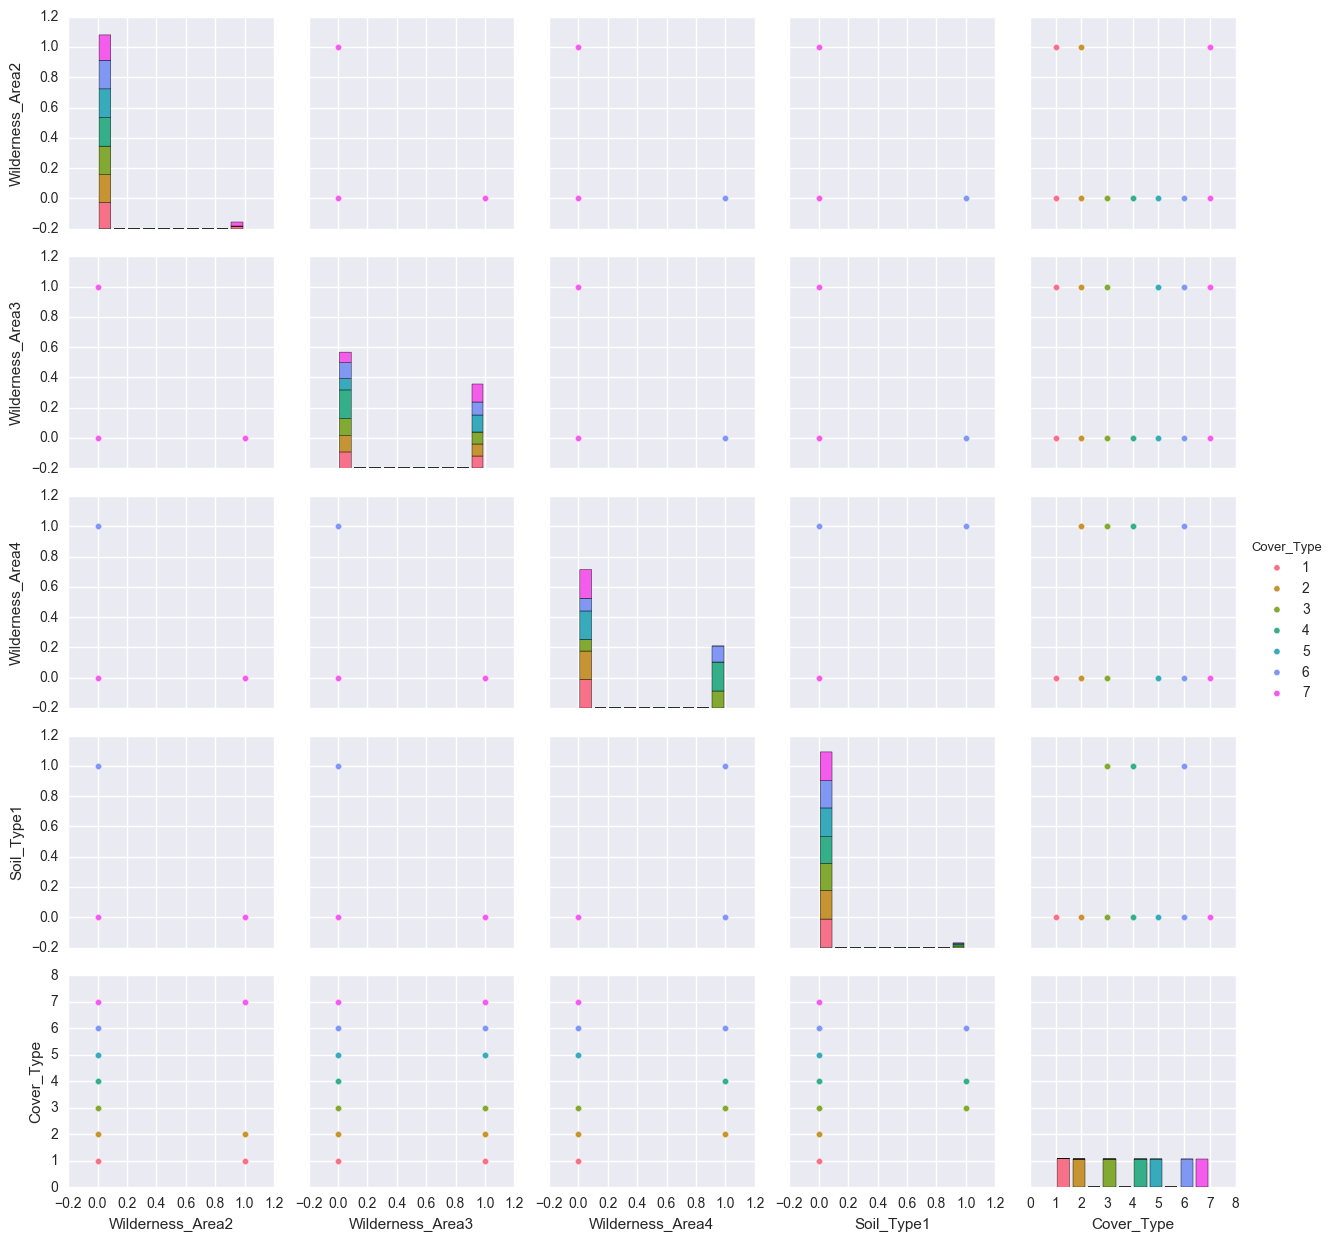

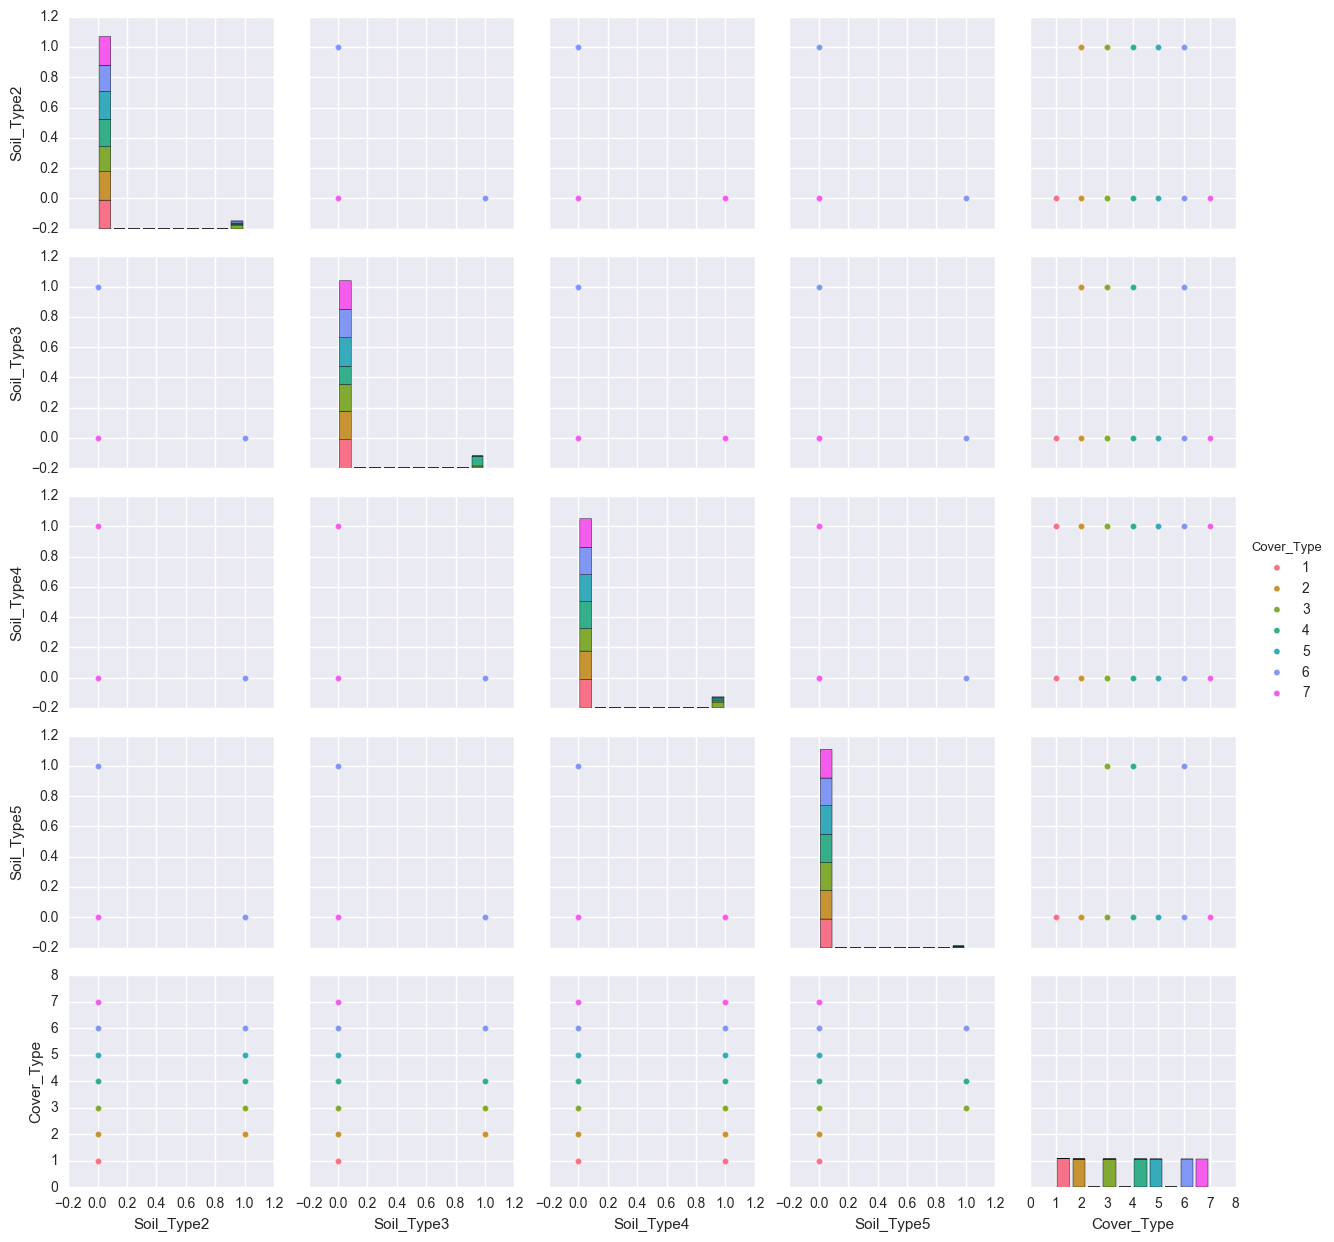

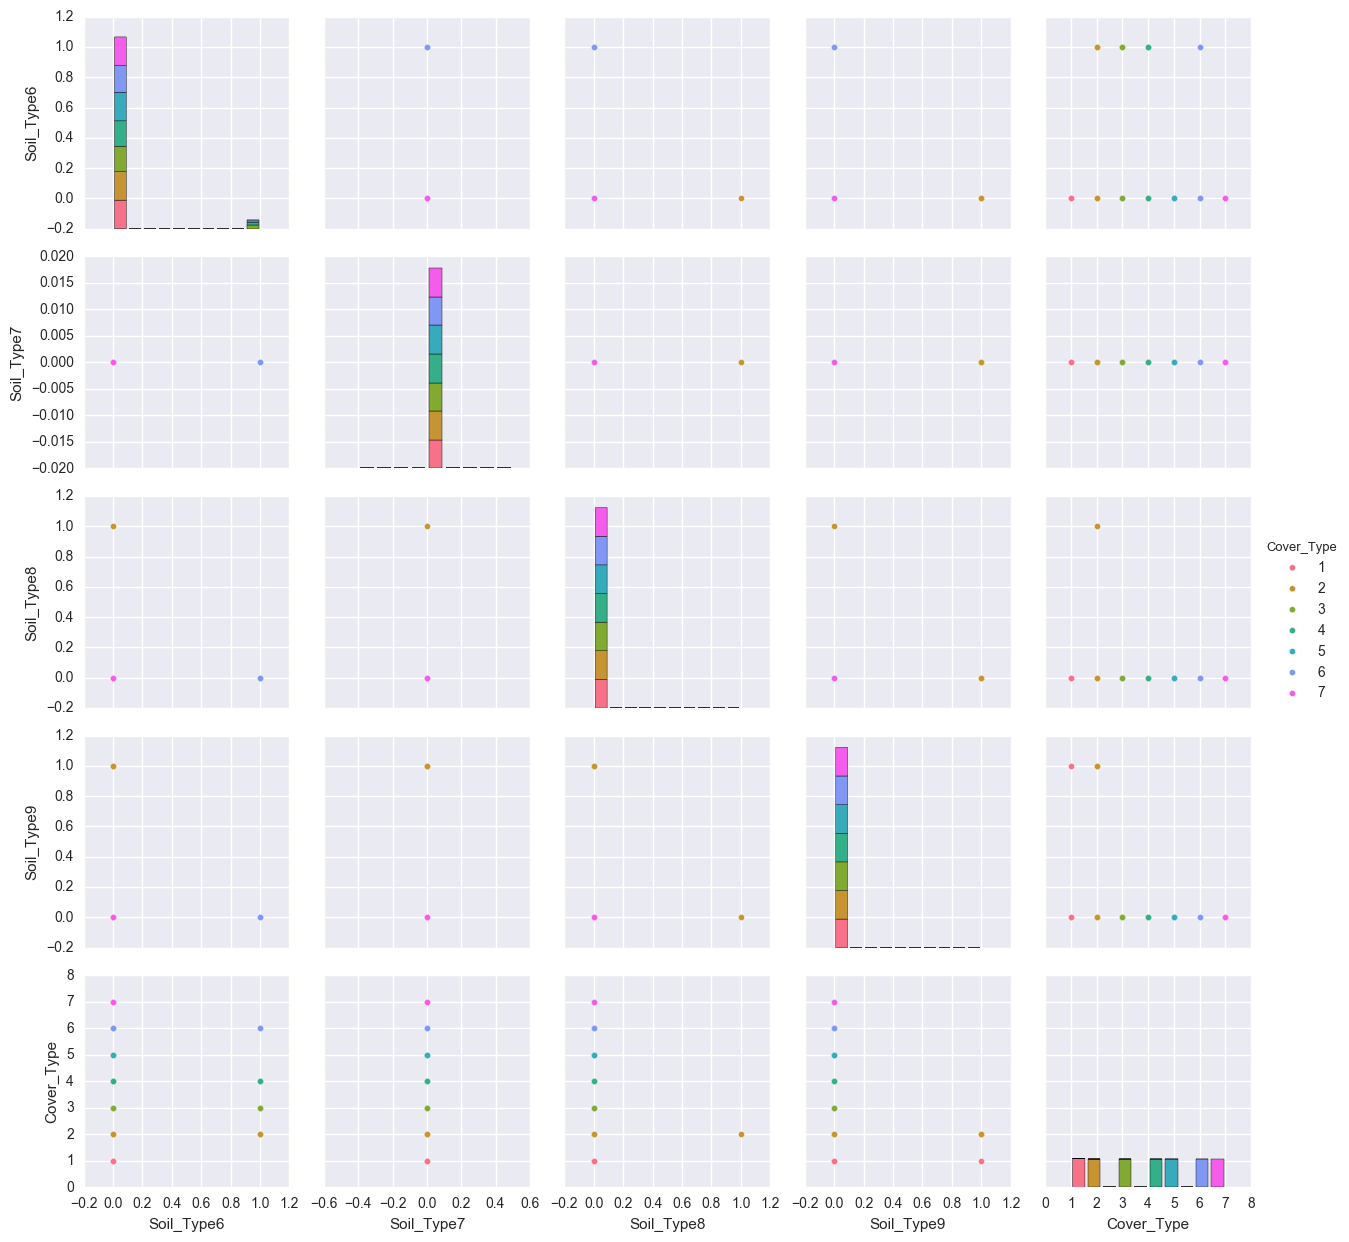

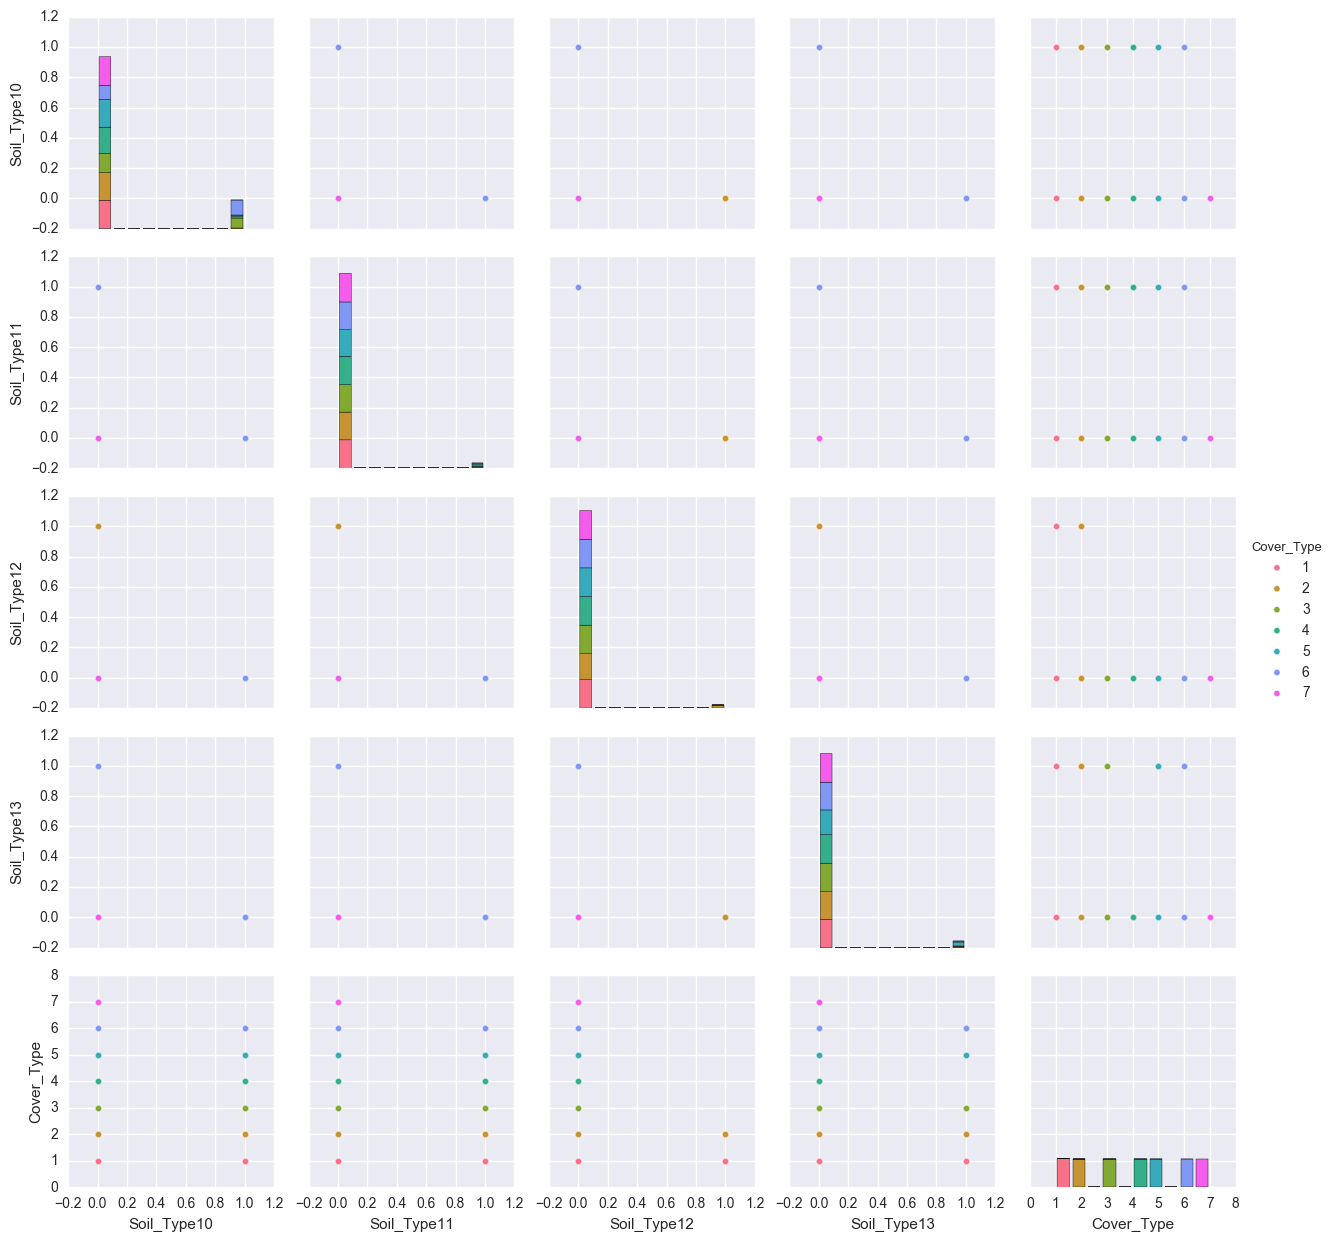

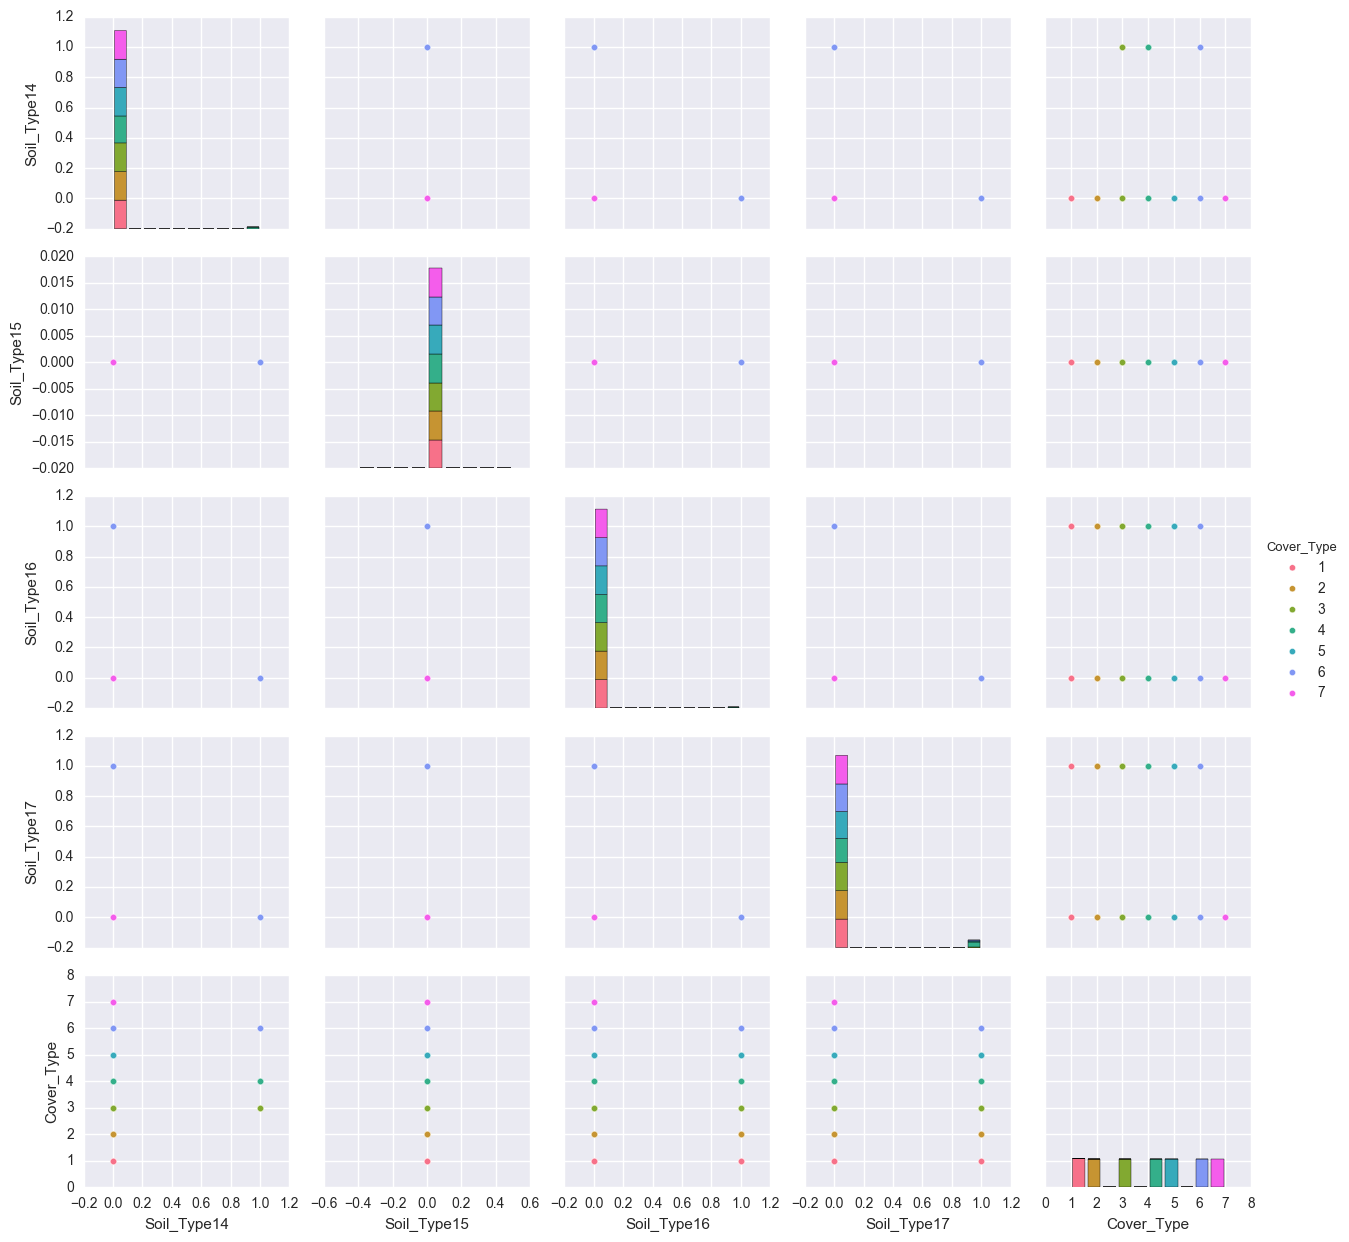

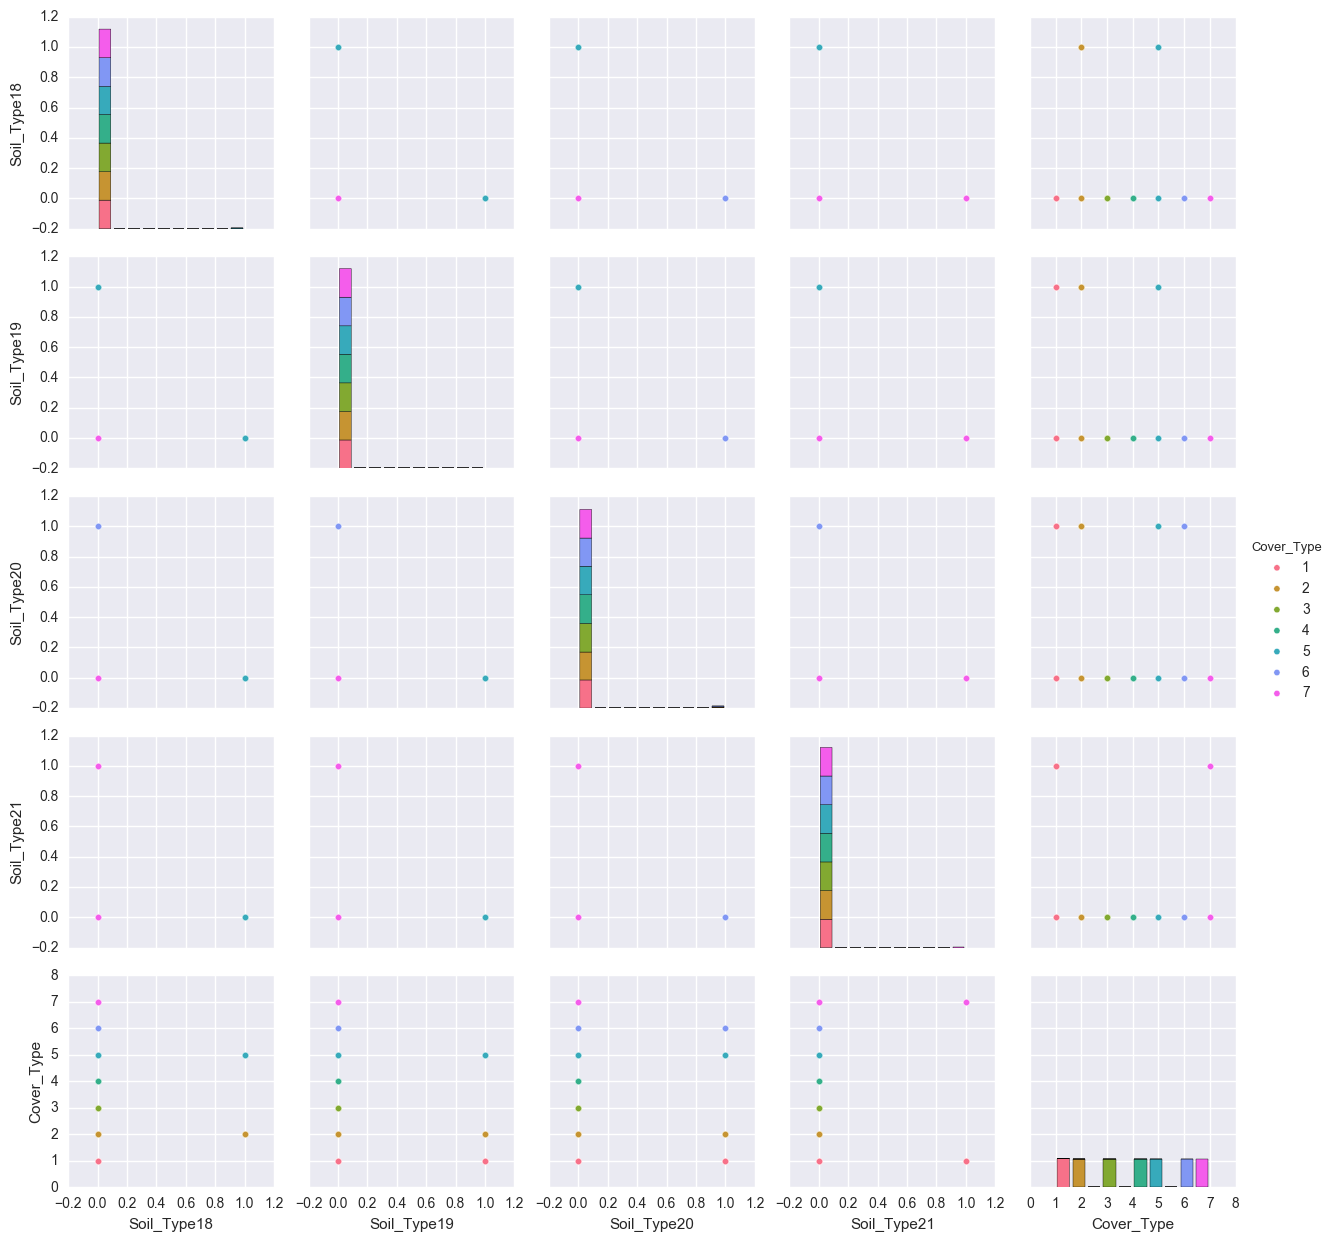

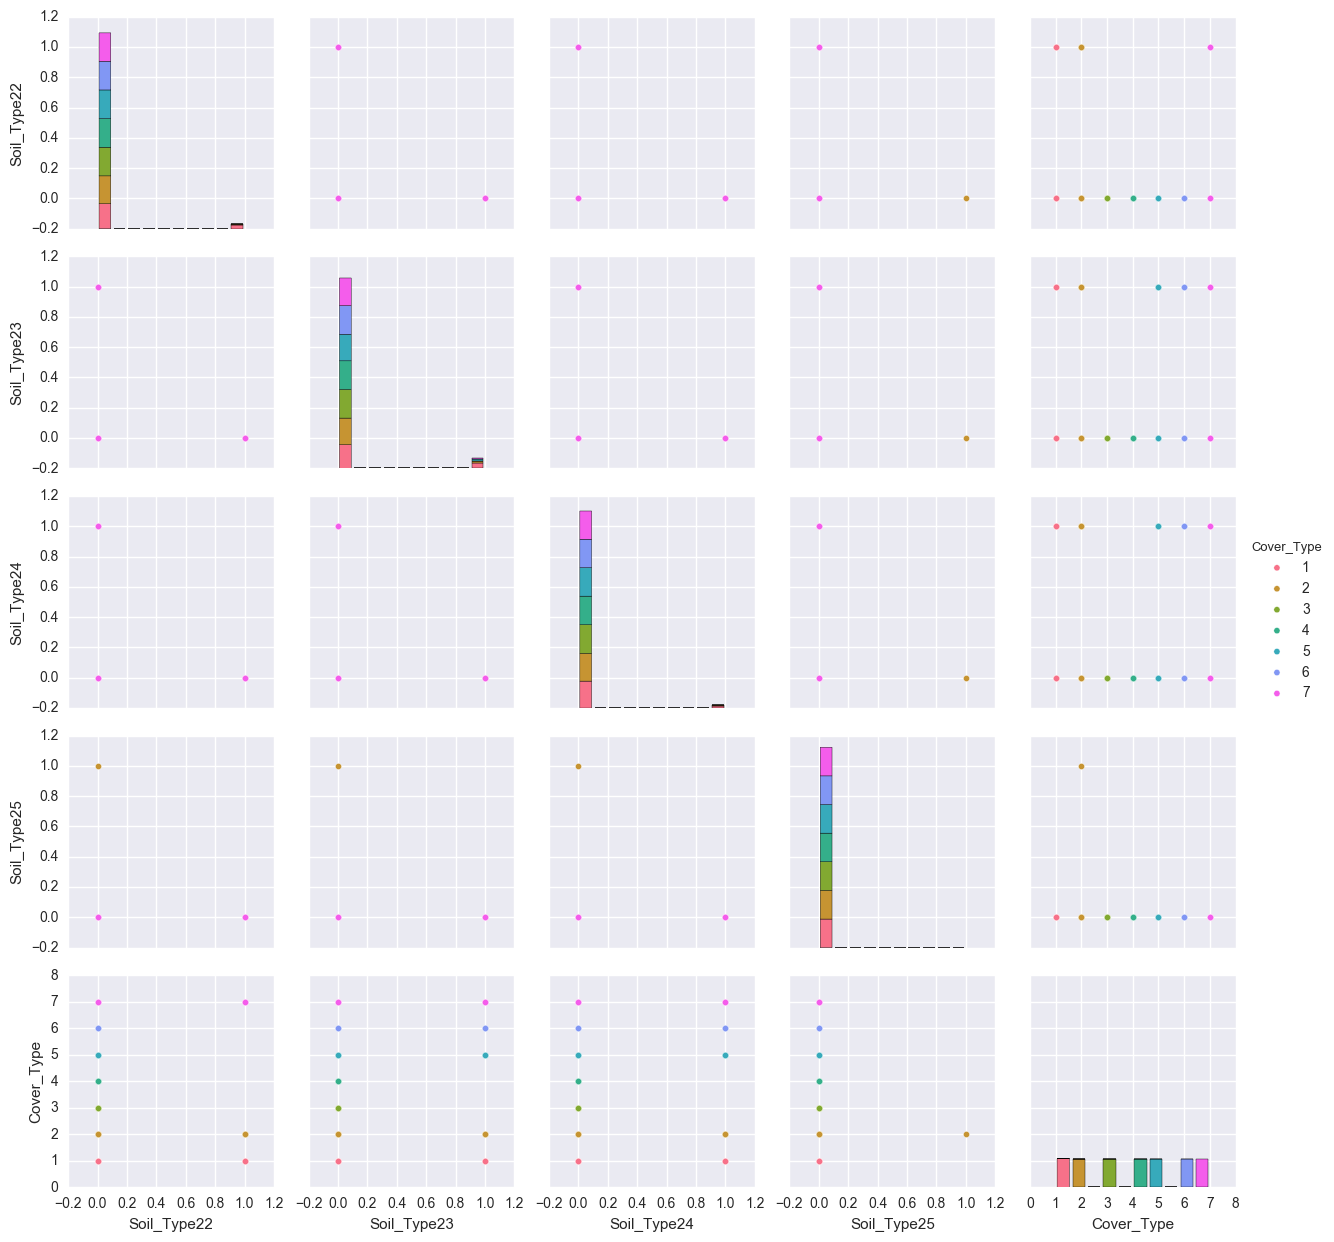

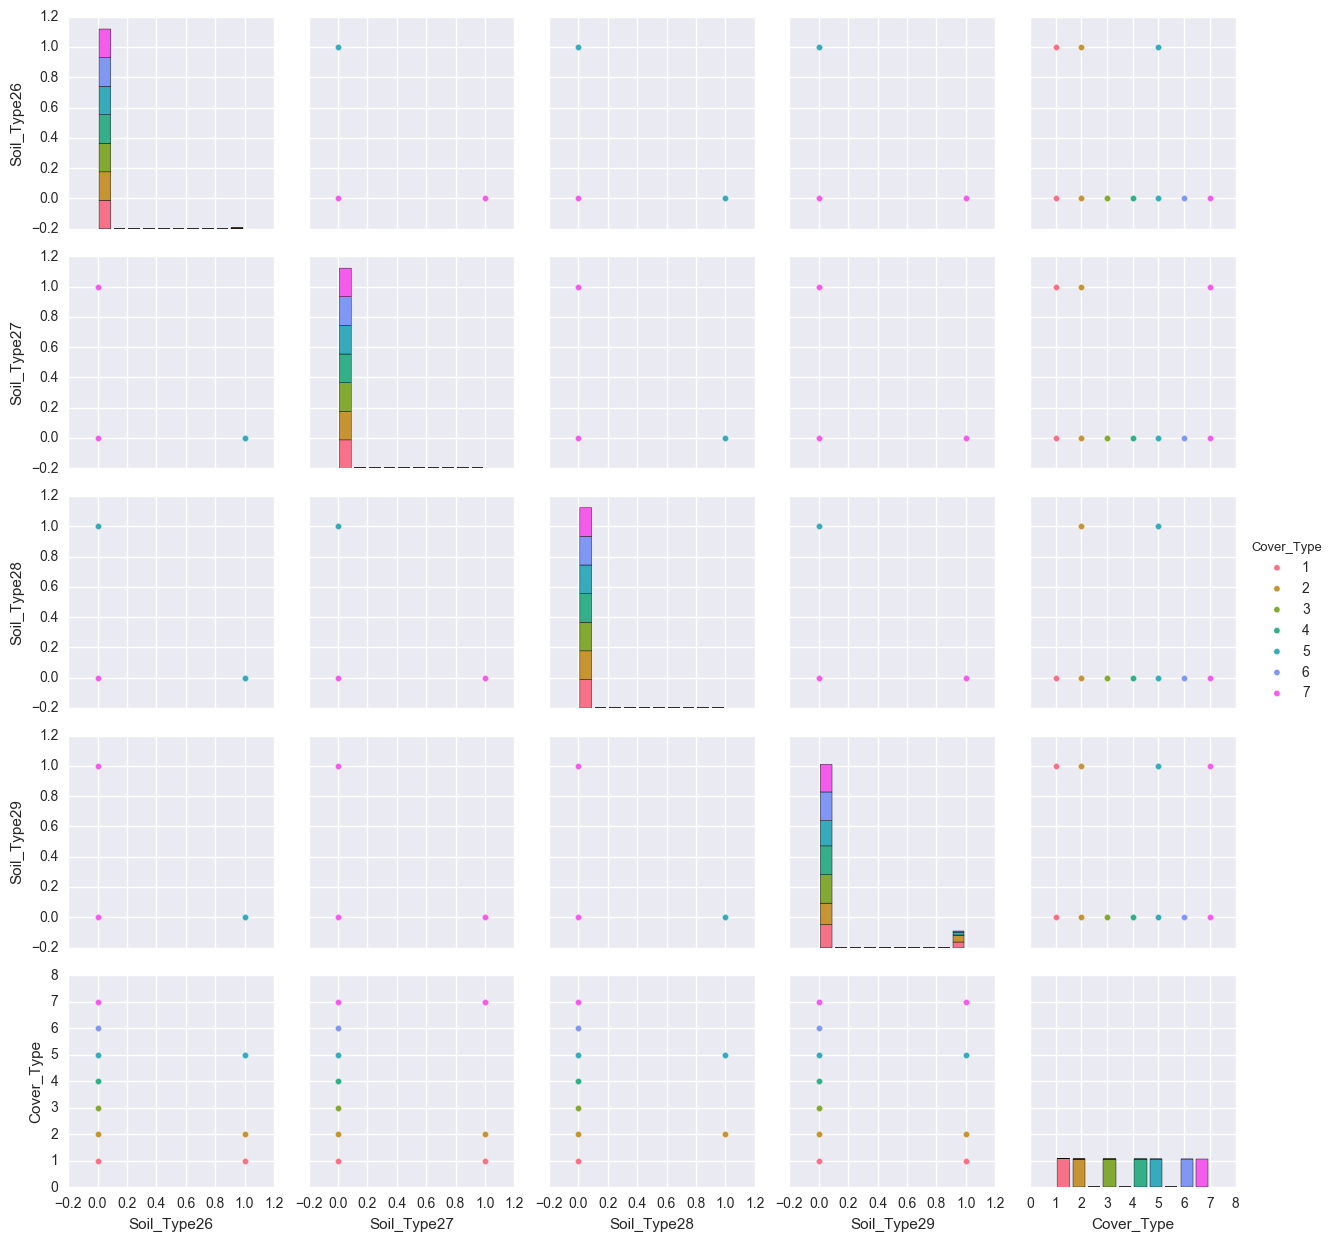

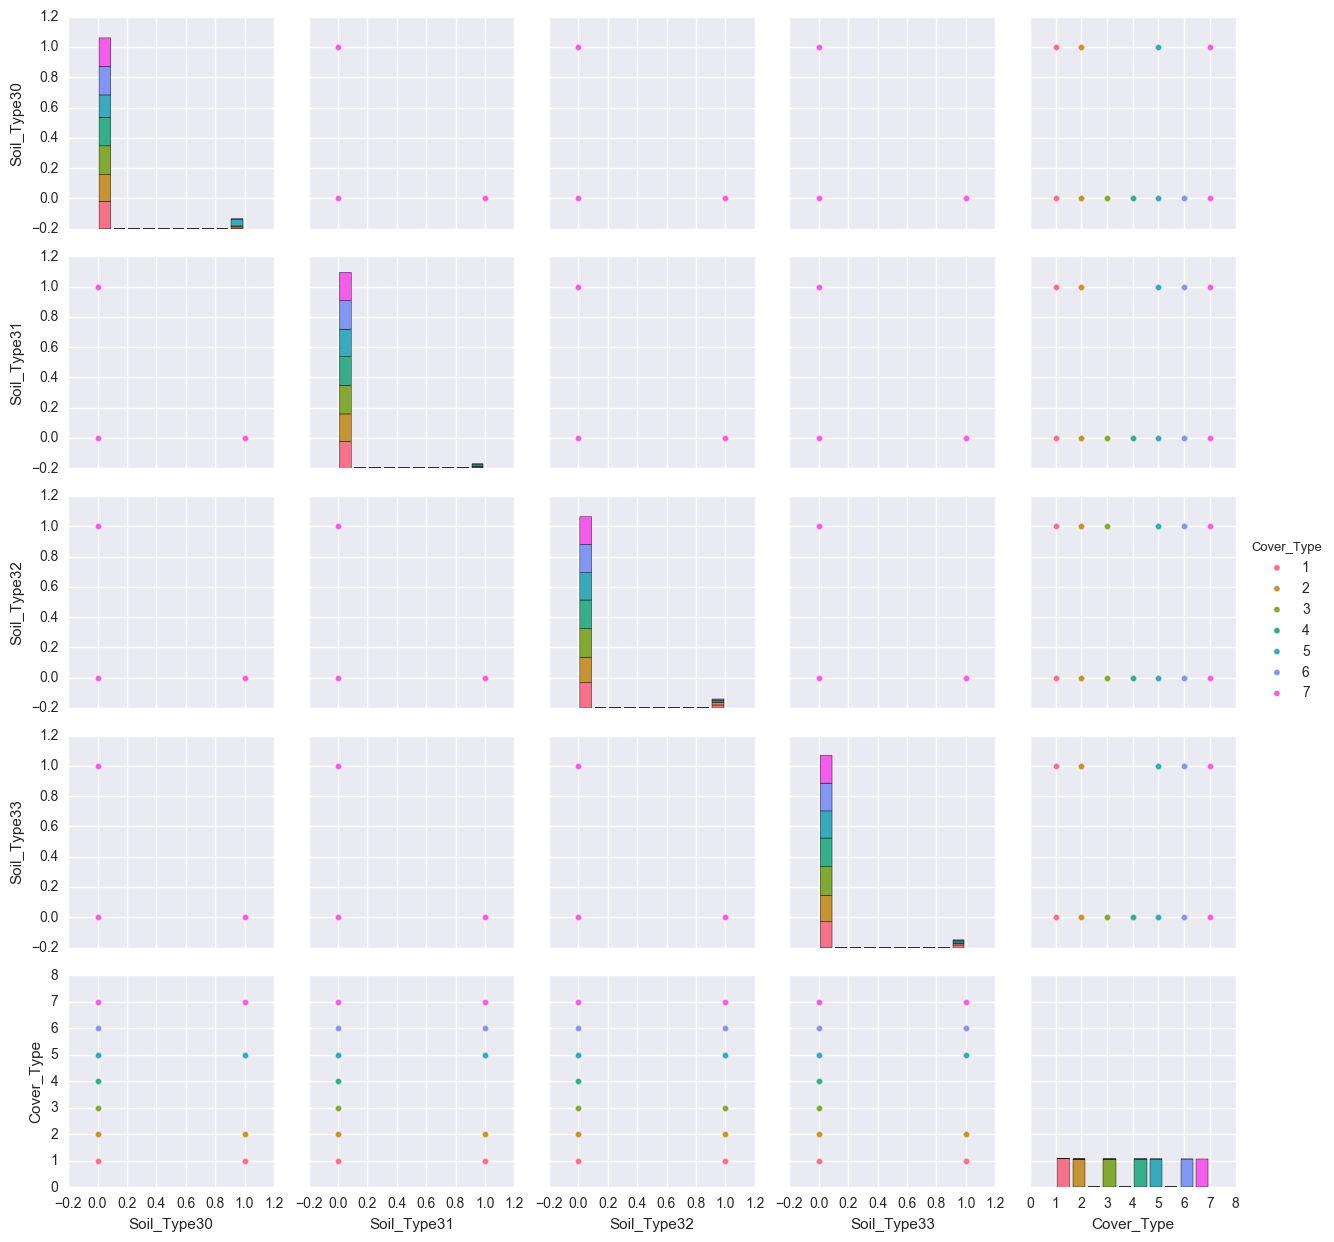

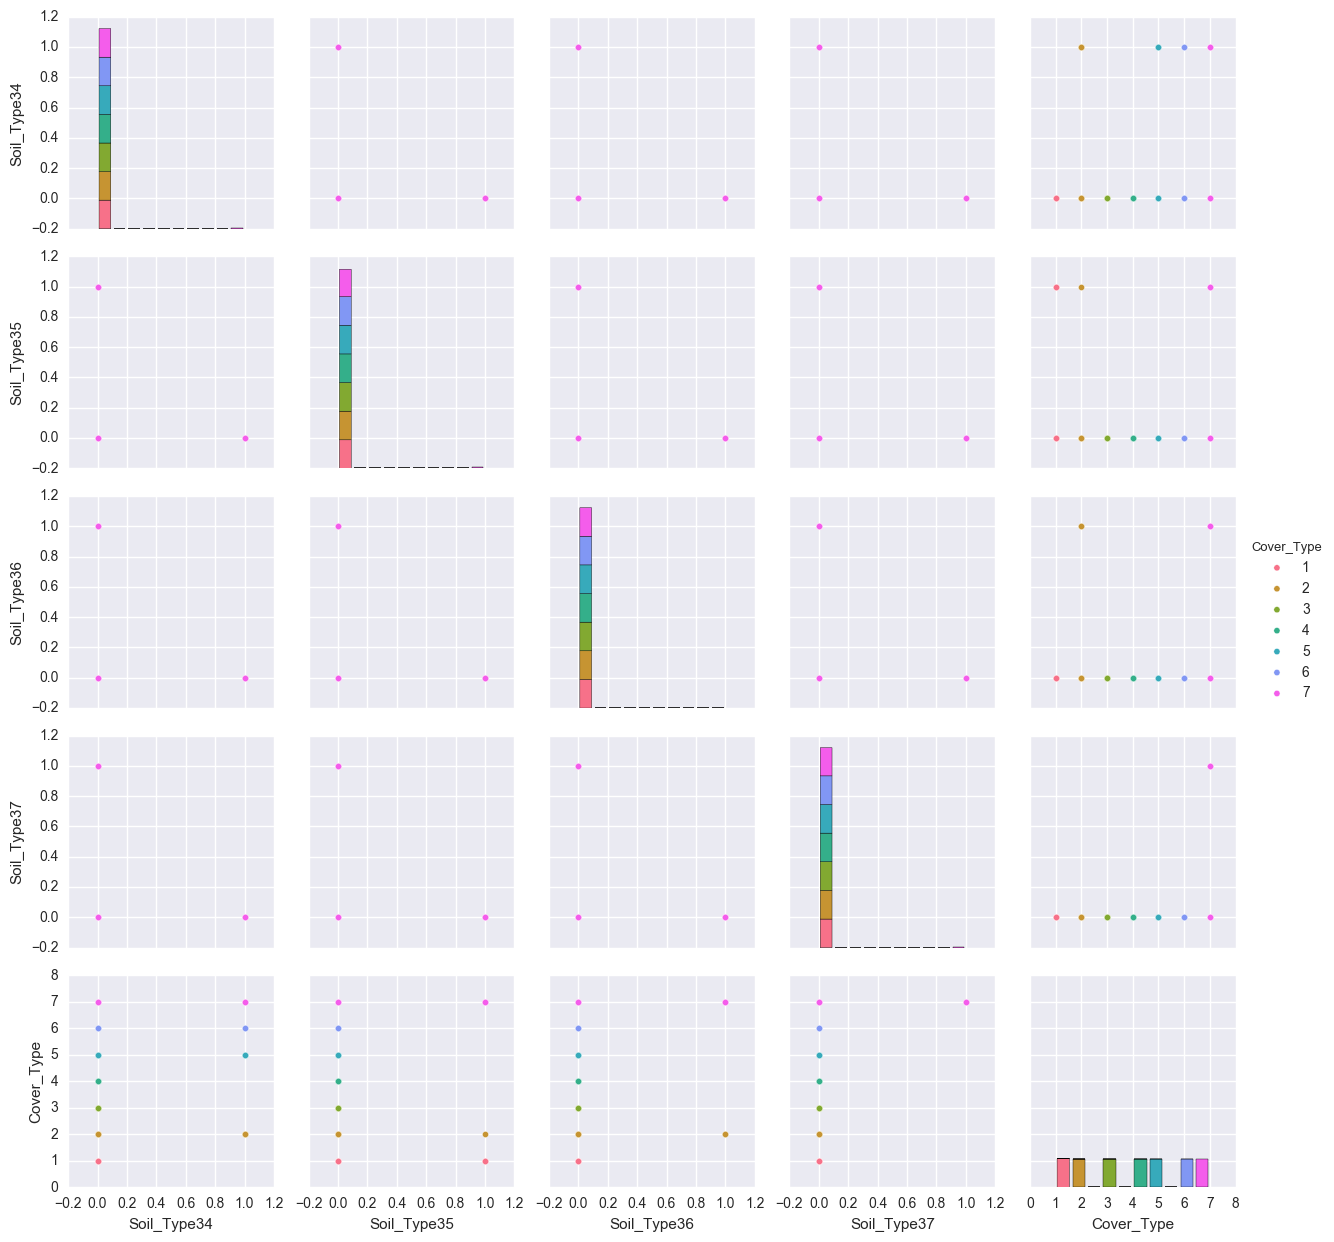

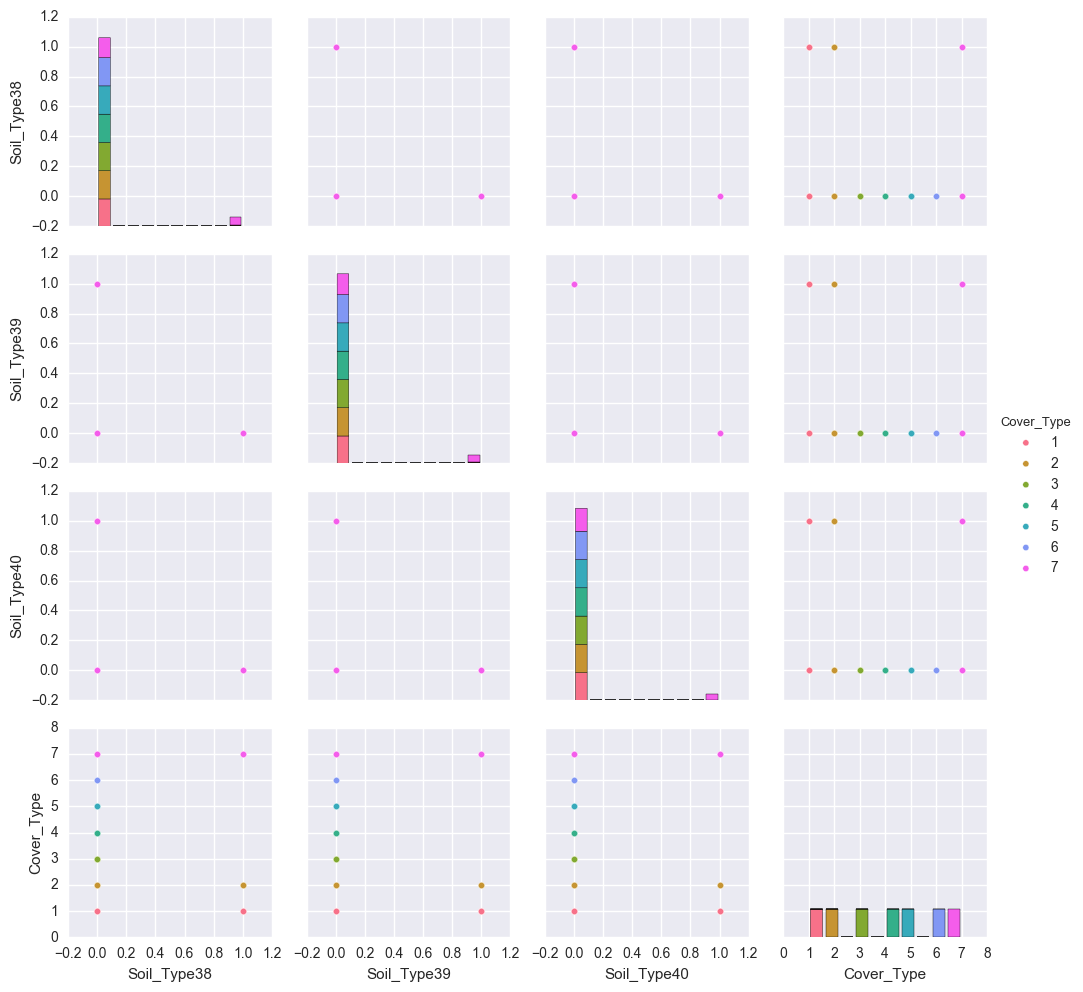

In [13]:
count = 0
for column in train.columns:
    count += 1
    if count % 4 == 0:
        temp = train.iloc[:, count-4:count]
        temp['Cover_Type'] = train['Cover_Type']
        sns.pairplot(temp, hue="Cover_Type");

/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


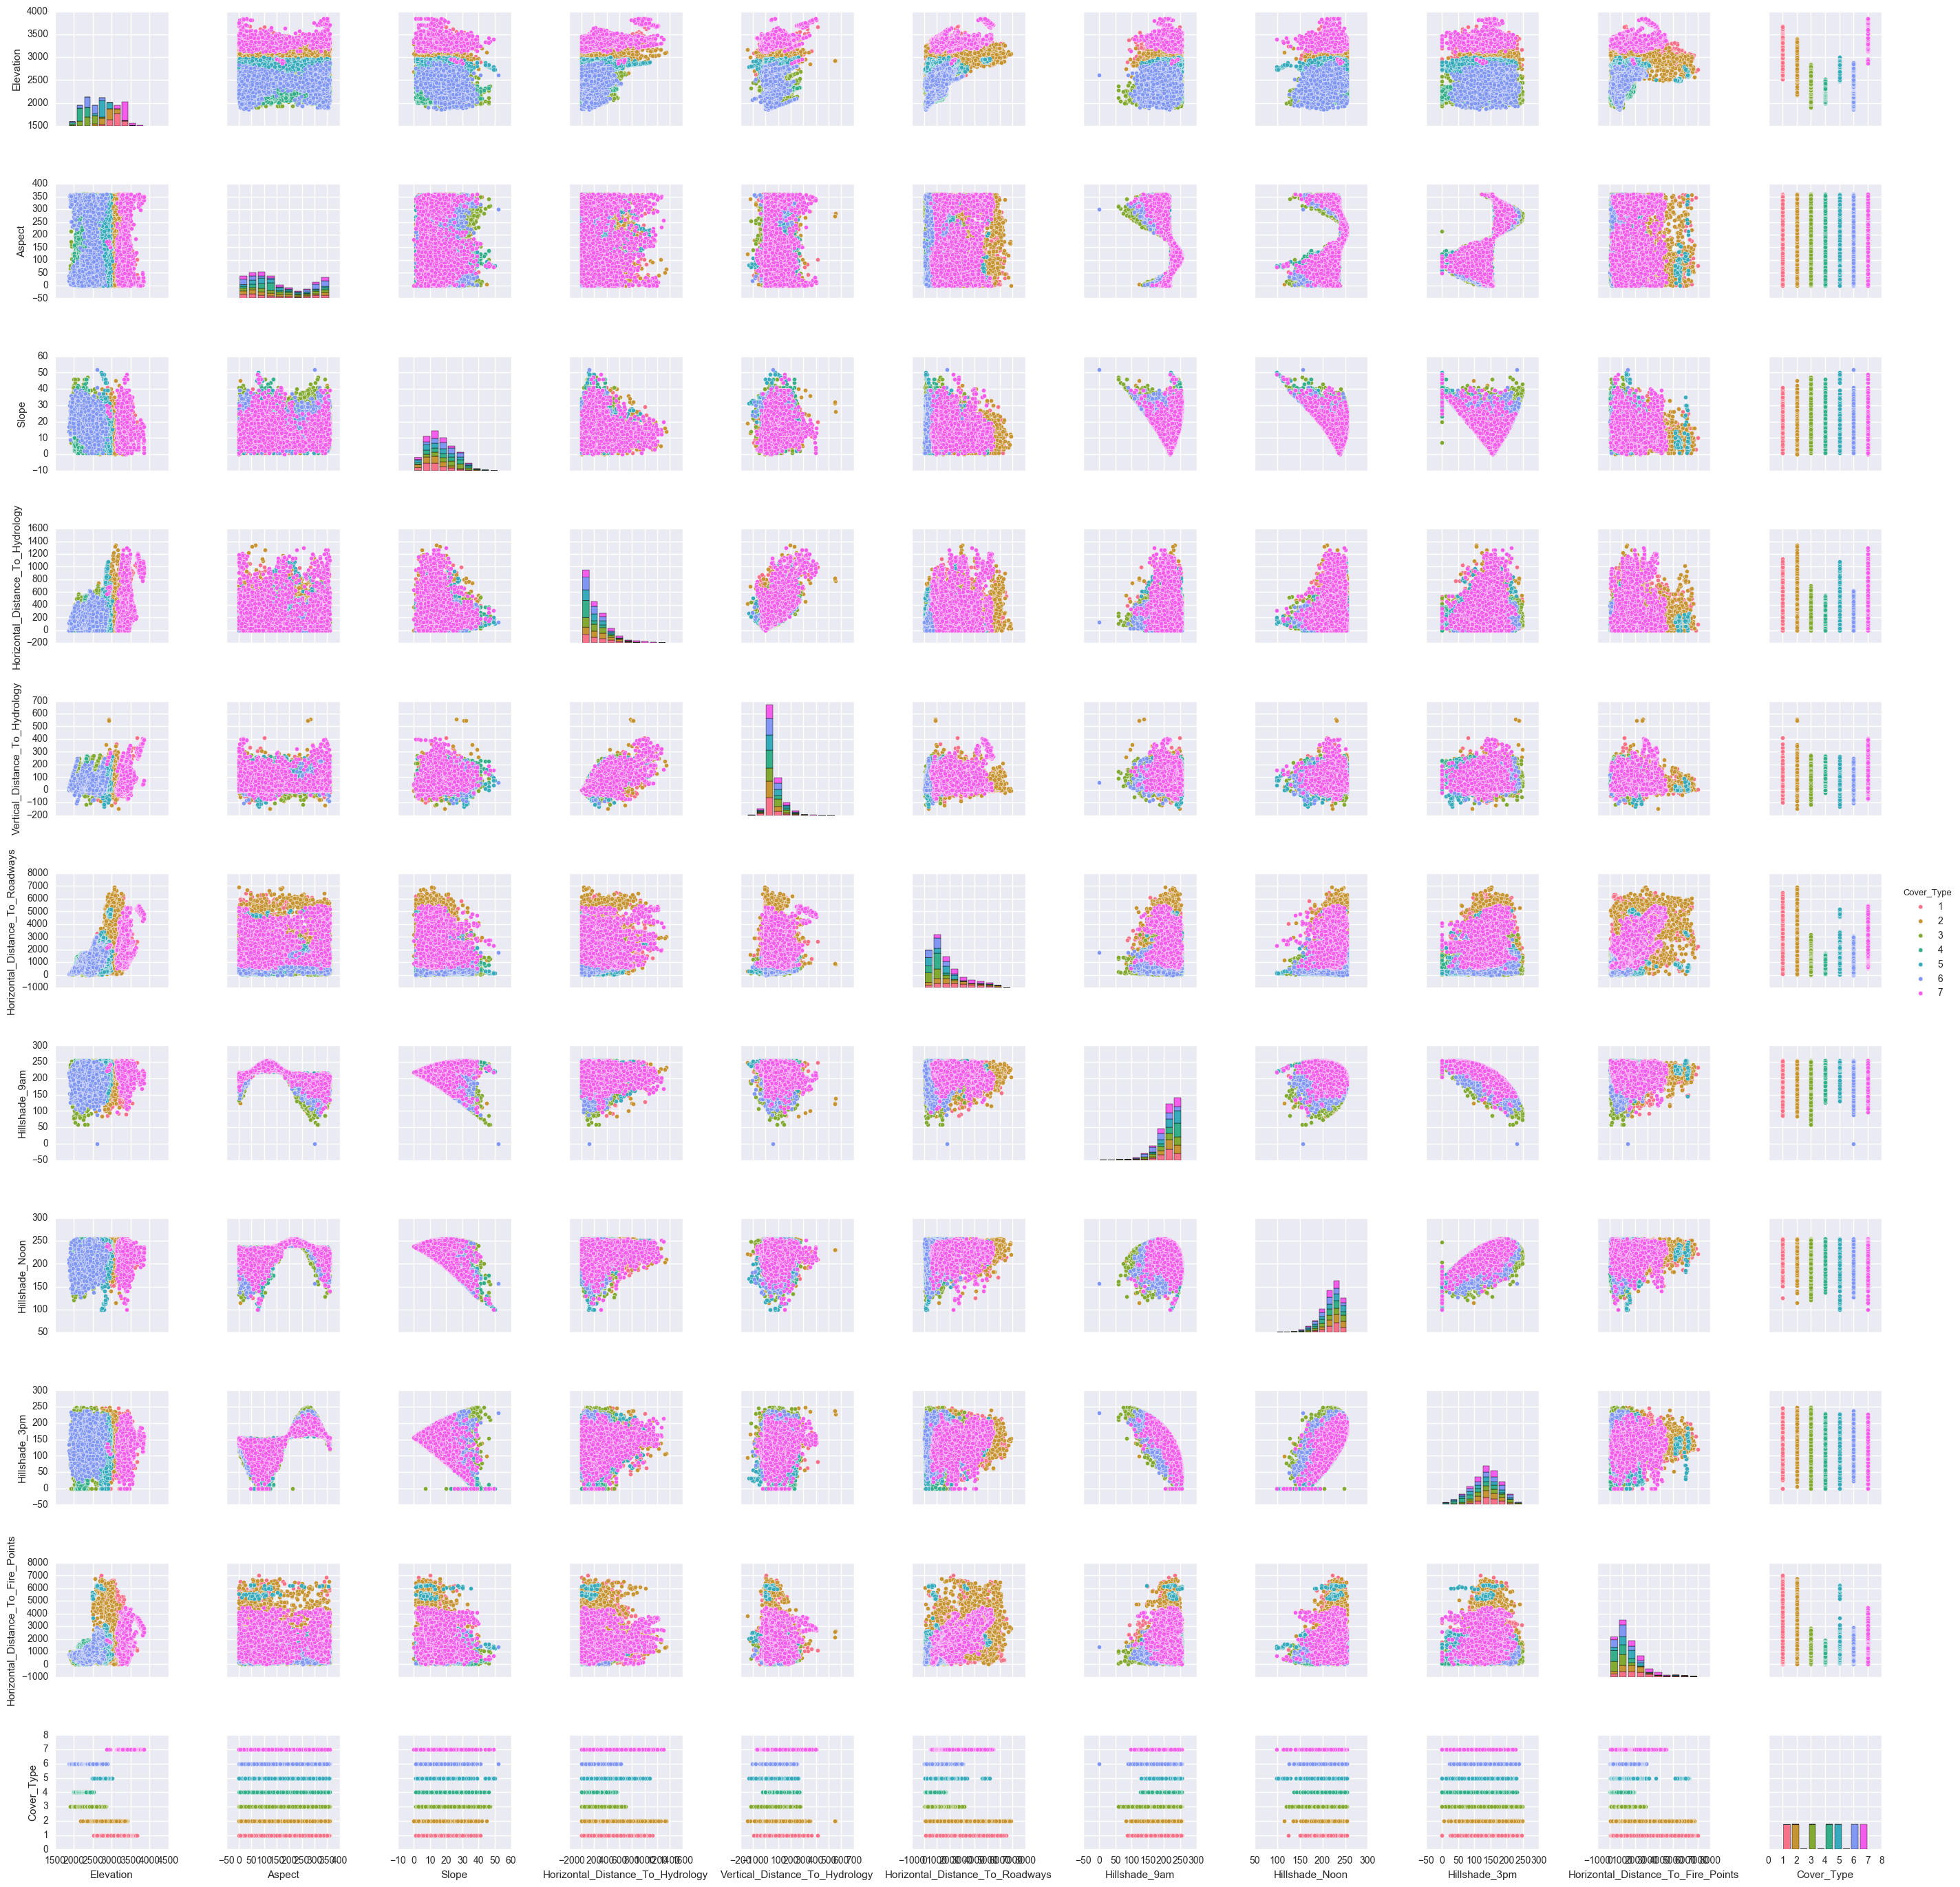

In [53]:
subset_train['Cover_Type'] = train['Cover_Type']

sns.pairplot(subset_train, hue="Cover_Type");

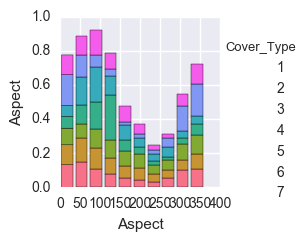

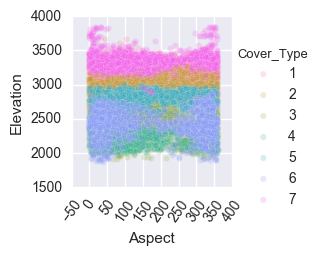

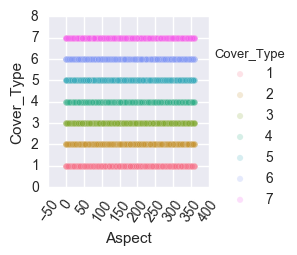

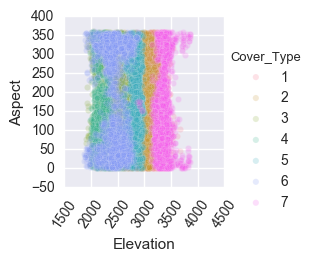

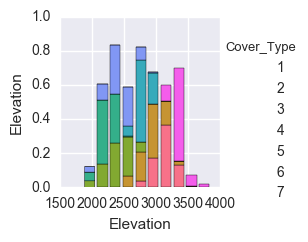

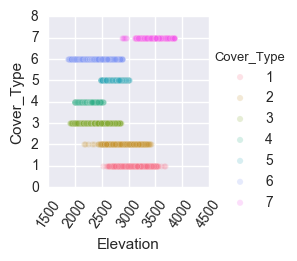

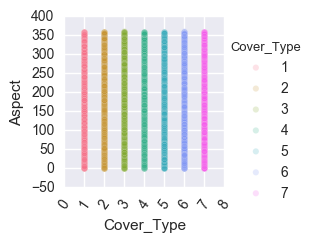

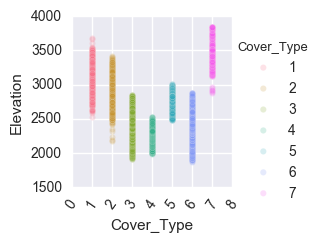

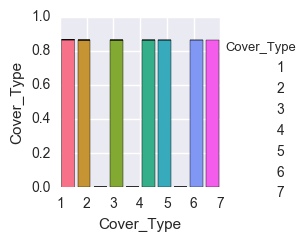

In [511]:
# Individual scatter plots
practice = train[['Aspect', 'Elevation', 'Cover_Type']]
for feature1 in practice:
    for feature2 in practice:
        sns.pairplot(data=practice, x_vars=feature1, y_vars=feature2, 
                     hue='Cover_Type', plot_kws={'alpha':0.2})
        plt.xticks(rotation=55)

In [12]:
# Aspect looks to be pretty useless here compared to Cover_Type
# Maybe Hillshade_3pm as well?

In [13]:
# Full Correlation Matrix
train.corr()

Elevation    Aspect     Slope  \
Elevation                            1.000000 -0.011096 -0.312640   
Aspect                              -0.011096  1.000000  0.028148   
Slope                               -0.312640  0.028148  1.000000   
Horizontal_Distance_To_Hydrology     0.412712  0.040732 -0.055976   
Vertical_Distance_To_Hydrology       0.122092  0.056412  0.265314   
Horizontal_Distance_To_Roadways      0.578659  0.066184 -0.277049   
Hillshade_9am                        0.097900 -0.593997 -0.200072   
Hillshade_Noon                       0.215782  0.324912 -0.612613   
Hillshade_3pm                        0.089518  0.635022 -0.326887   
Horizontal_Distance_To_Fire_Points   0.443563 -0.052169 -0.239527   
Wilderness_Area1                     0.330417 -0.131262 -0.152820   
Wilderness_Area2                     0.261729  0.028238 -0.065923   
Wilderness_Area3                     0.354025  0.032578 -0.113033   
Wilderness_Area4                    -0.783651  0.075228  0.286985   
Soil_Type1                          -0.218818 -0.024538  0.099355   
Soil_Type2                          -0.147947 -0.020970 -0.081498   
Soil_Type3                          -0.307523 -0.069120  0.265541   
Soil_Type4                          -0.125342  0.018019  0.087841   
Soil_Type5                          -0.141478  0.000343  0.074720   
Soil_Type6                          -0.187354 -0.006066 -0.047868   
Soil_Type8                           0.002934  0.001723 -0.012989   
Soil_Type9                          -0.010571 -0.019391 -0.022220   
Soil_Type10                         -0.357816  0.111959  0.255804   
Soil_Type11                         -0.037906 -0.034549 -0.109798   
Soil_Type12                          0.017432 -0.044142 -0.115088   
Soil_Type13                          0.039304  0.024312  0.119863   
Soil_Type14                         -0.140619  0.001181 -0.054085   
Soil_Type16                         -0.066252  0.027121 -0.064321   
Soil_Type17                         -0.200663  0.029870 -0.124375   
Soil_Type18                         -0.035173 -0.042140 -0.069326   
Soil_Type19                          0.029808  0.007570 -0.047742   
Soil_Type20                          0.008548 -0.023330 -0.068508   
Soil_Type21                          0.032509  0.018815 -0.033935   
Soil_Type22                          0.146236  0.022301 -0.076393   
Soil_Type23                          0.159872  0.041880 -0.184528   
Soil_Type24                          0.097647  0.005480  0.017982   
Soil_Type25                          0.010586 -0.002340  0.011062   
Soil_Type26                          0.020669 -0.009775 -0.030700   
Soil_Type27                          0.040019  0.018986  0.012295   
Soil_Type28                         -0.001077  0.026330  0.036082   
Soil_Type29                          0.165304 -0.063428 -0.083108   
Soil_Type30                          0.048204 -0.086897  0.118725   
Soil_Type31                          0.093191  0.008160 -0.076851   
Soil_Type32                          0.172349  0.003700 -0.147258   
Soil_Type33                          0.123821  0.018719  0.072027   
Soil_Type34                          0.021876  0.012927 -0.030590   
Soil_Type35                          0.120157 -0.004235 -0.048855   
Soil_Type36                          0.040571  0.003160 -0.004570   
Soil_Type37                          0.073825 -0.046309  0.003129   
Soil_Type38                          0.323440  0.043860 -0.148342   
Soil_Type39                          0.296405 -0.031342  0.051900   
Soil_Type40                          0.306755  0.007208 -0.043513   
Cover_Type                           0.016090  0.008015  0.087722   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.412712   
Aspect                                                      0.040732   
Slope                                                      -0.055976   
Horizontal_Distance_T

In [14]:
# Find all correlations above 0.5
train_corr_df = train.corr()

for feature in train_corr_df:
    lower_bound = 0.5
    subset = pd.DataFrame(train_corr_df[feature])
    subset['Cover_Type'] = train_corr_df['Cover_Type']
    high_corr = pd.DataFrame(subset[((subset[feature] > lower_bound) 
                                     & (subset[feature] < 1))].dropna())
    if len(high_corr) != 0:
        display(high_corr)
        print()

Elevation  Cover_Type
Horizontal_Distance_To_Roadways   0.578659   -0.105662

Aspect  Cover_Type
Hillshade_3pm  0.635022   -0.053399

Horizontal_Distance_To_Hydrology  Cover_Type
Vertical_Distance_To_Hydrology                          0.652142    0.075647

Vertical_Distance_To_Hydrology  Cover_Type
Horizontal_Distance_To_Hydrology                        0.652142   -0.010515

Horizontal_Distance_To_Roadways  Cover_Type
Elevation                         0.578659     0.01609

Hillshade_Noon  Cover_Type
Hillshade_3pm        0.614526   -0.053399

Hillshade_3pm  Cover_Type
Aspect               0.635022    0.008015
Hillshade_Noon       0.614526   -0.098905

Wilderness_Area1  Cover_Type
Soil_Type29          0.546309   -0.218564

Soil_Type29  Cover_Type
Wilderness_Area1     0.546309   -0.230117

In [15]:
# Interesting that we see a few features are highly correlated with each other
# and no features are very correlated with the target class
# How do I use correlation for feature selection?
# Is PCA better? Or just different?
# Keep in mind that these are univariate tests - aren't multivariate generally better?

In [16]:
# Adding a new feature by ((Horizontal_Distance_To_Hydrology)**2 + (Vertical_Distance_To_Hydrology)**2)**0.5
# Did not add value to correlation with Cover_Type

# Build an ensemble of random forest classifiers

In [17]:
train = pd.read_csv('data/train.csv')
train.drop(['Id', 'Soil_Type7', 'Soil_Type15'], axis=1, inplace=True)
train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type8  Soil_Type9  Soil_Type10  \
0           0           0           0           0           0            0   
1           0           0           0           0           0            0   
2           0           0           0           0           0            0   
3           0           0           0           0           0            0   
4           0           0           0           0           0            0   

   Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type16  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            1            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type22  Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  \
0            0            0            1            0            0   
1            0            0            1            0            0   
2            0  

In [18]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [19]:
def create_ensemble(data, model):

    proba_df = pd.DataFrame()
    models = {}
    optimal_threshold_dict = {}

    target = data['Cover_Type']
    train = data.drop('Cover_Type', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(train, target, 
                                                        random_state=42, 
                                                        test_size=0.10, 
                                                        stratify=target) # stratified split

    for i in range(1,8):
        y_train_i = y_train.copy()
        y_train_i[y_train_i != i] = 0
        y_train_i[y_train_i == i] = 1

        y_test_i = y_test.copy() 
        y_test_i[y_test_i != i] = 0
        y_test_i[y_test_i == i] = 1    

        if model == 'RandomForestClassifier':
            param_grid = {'n_estimators':[60,70,80,90]}
            grid_search = GridSearchCV(RandomForestClassifier(), 
                                       param_grid, cv=5, scoring='roc_auc') # stratified cv
            grid_search.fit(X_train, y_train_i)
            
            models[i] = grid_search.best_estimator_
            predictions = grid_search.best_estimator_.predict(X_test)
            probab = grid_search.best_estimator_.predict_proba(X_test)[:,1]
            proba_df[i] = probab
            
        elif model == 'XGClassifier':
            pass

        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_i, probab)
        plt.title('Receiver Operating Characteristic (ROC)\nCover Type = {}'.format(i))
        plt.plot(false_positive_rate, true_positive_rate)
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([-0.1,1.2])
        plt.ylim([-0.1,1.2])
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.xlabel('False Positive Rate (Specificity)')
        plt.show()
        
        roc_auc = auc(false_positive_rate, true_positive_rate)
        print('AUC:', roc_auc)
        
        optimal_threshold = Find_Optimal_Cutoff(y_test_i,probab)[0]
        optimal_threshold_dict[i] = optimal_threshold
        print('Optimal Threshold:', optimal_threshold)
        
        cm = confusion_matrix(y_test_i, predictions)
        print('Confusion Matrix:\n', cm)

    observed = y_test.reset_index(drop=True)
    proba_df['Observed'] = observed  
    
    return models, proba_df, optimal_threshold_dict

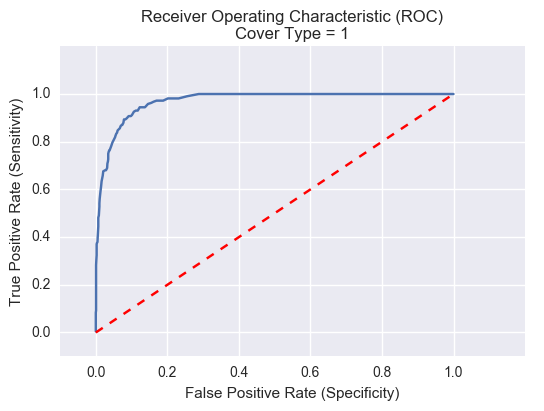

AUC: 0.970080661294
Optimal Threshold: 0.255555555556
Confusion Matrix:
 [[1254   42]
 [  63  153]]


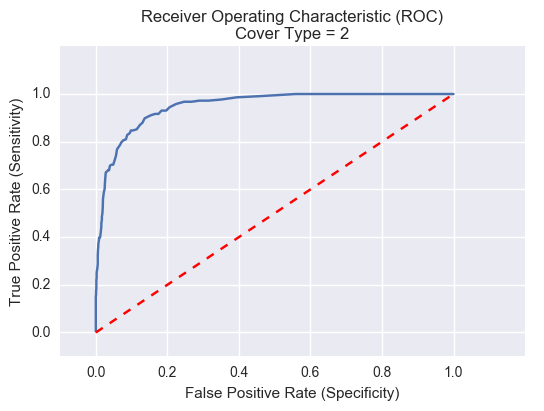

AUC: 0.950058227595
Optimal Threshold: 0.211111111111
Confusion Matrix:
 [[1272   24]
 [ 108  108]]


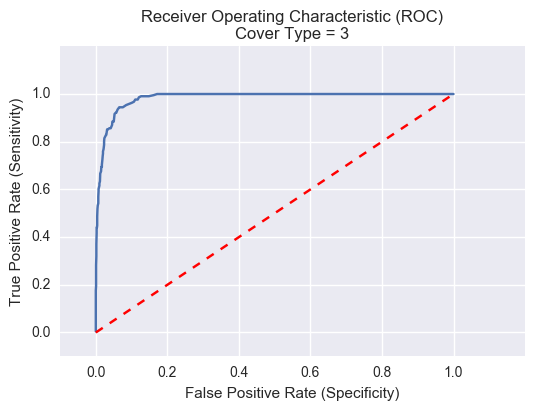

AUC: 0.983183656264
Optimal Threshold: 0.3
Confusion Matrix:
 [[1270   26]
 [  54  162]]


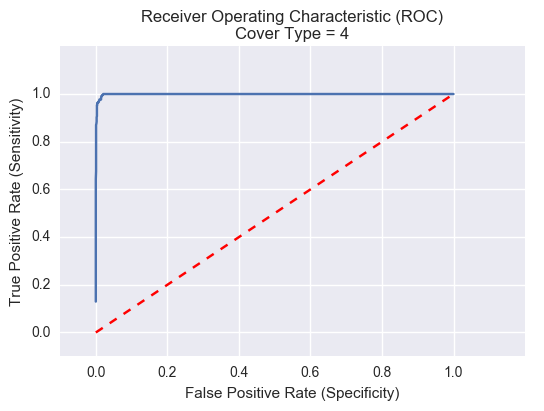

AUC: 0.999083719136
Optimal Threshold: 0.4
Confusion Matrix:
 [[1288    8]
 [   8  208]]


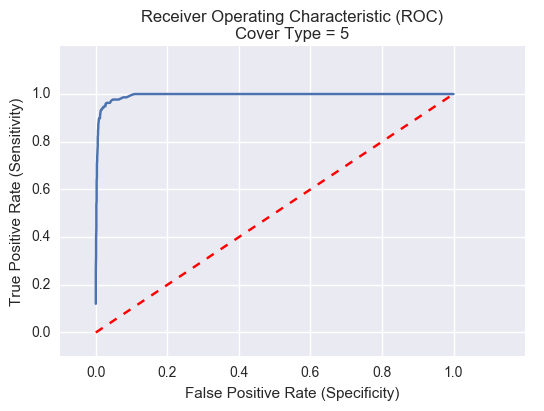

AUC: 0.99449874257
Optimal Threshold: 0.25
Confusion Matrix:
 [[1285   11]
 [  23  193]]


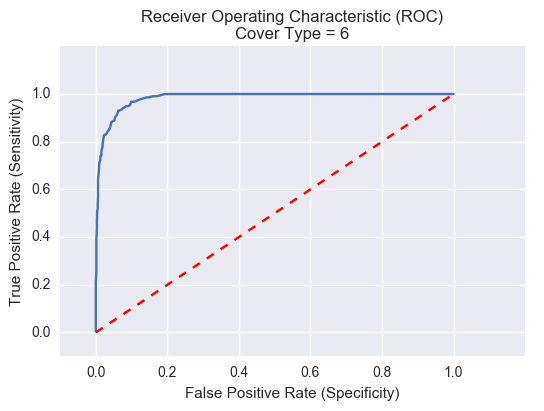

AUC: 0.983485510974
Optimal Threshold: 0.266666666667
Confusion Matrix:
 [[1275   21]
 [  51  165]]


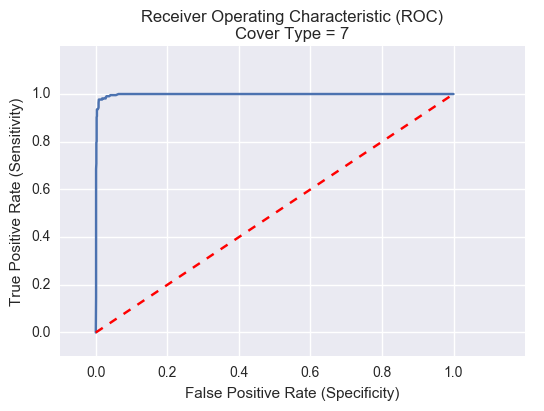

AUC: 0.997903092135
Optimal Threshold: 0.314285714286
Confusion Matrix:
 [[1286   10]
 [  11  205]]


In [20]:
# Generate models and probability distributions
# Show ROC/AUC, confusion matrices, and optimal threshold values (non-softmax)
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    models_randomforest, proba_randomforest, optimal_threshold_randomforest = \
        create_ensemble(train, model='RandomForestClassifier')

In [21]:
# What models were generated?
models_randomforest

{1: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=90, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
 2: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=90, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
 3: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
    

In [22]:
# Show the found thresholds (non-softmax)
# So this is saying that, for cover type 1, if the probability is above 25.5% then classify as 1?
# Baseline probability is 100/7 = 14.3% (the classes were balanced originally and stratified during split, 
# so how do these thresholds look?)
optimal_threshold_randomforest

{1: 0.25555555555555554,
 2: 0.21111111111111111,
 3: 0.29999999999999999,
 4: 0.40000000000000002,
 5: 0.25,
 6: 0.26666666666666666,
 7: 0.31428571428571428}

In [23]:
# Show original probabilities (non-softmax)
proba_randomforest.head()

1         2         3    4       5         6         7  Observed
0  0.033333  0.277778  0.000000  0.0  0.7750  0.022222  0.000000         2
1  0.044444  0.166667  0.033333  0.0  0.3375  0.211111  0.000000         2
2  0.144444  0.177778  0.000000  0.0  0.6875  0.022222  0.014286         5
3  0.544444  0.600000  0.000000  0.0  0.0000  0.000000  0.014286         2
4  0.011111  0.000000  0.000000  0.0  0.0000  0.000000  1.000000         7

In [24]:
# For each cover type, what are the mean and median predicted probabilities?

proba_stats = {}

try:
    proba_randomforest.drop('Predicted_Max', axis=1, inplace=True)
    proba_randomforest.drop('Predicted_Max_2', axis=1, inplace=True)
except:
    pass

for i in range(1,8):
    temp = proba_randomforest[proba_randomforest['Observed'] == i]
    temp_list = []
    for column in temp.columns[:-1]:
        temp_list.append([#'Mean_{}: {:.2f}'.format(column, temp[column].mean()), 
                          #'Min_{}: {:.2f}'.format(column, temp[column].min()),
                          '25th_P_{}: {:.2f}'.format(column, np.percentile(temp[column], 25)),
                          'Median_{}: {:.2f}'.format(column, temp[column].median()),
                          '75th_P_{}: {:.2f}'.format(column, np.percentile(temp[column], 75)),
                          'Max_{}: {:.2f}'.format(column, temp[column].max())])
        
        
    proba_stats[i] = temp_list
        
proba_stats

{1: [['25th_P_1: 0.47', 'Median_1: 0.63', '75th_P_1: 0.77', 'Max_1: 0.97'],
  ['25th_P_2: 0.11', 'Median_2: 0.21', '75th_P_2: 0.36', 'Max_2: 0.77'],
  ['25th_P_3: 0.00', 'Median_3: 0.00', '75th_P_3: 0.00', 'Max_3: 0.14'],
  ['25th_P_4: 0.00', 'Median_4: 0.00', '75th_P_4: 0.00', 'Max_4: 0.01'],
  ['25th_P_5: 0.00', 'Median_5: 0.01', '75th_P_5: 0.03', 'Max_5: 0.84'],
  ['25th_P_6: 0.00', 'Median_6: 0.00', '75th_P_6: 0.01', 'Max_6: 0.21'],
  ['25th_P_7: 0.00', 'Median_7: 0.01', '75th_P_7: 0.11', 'Max_7: 1.00']],
 2: [['25th_P_1: 0.06', 'Median_1: 0.20', '75th_P_1: 0.42', 'Max_1: 0.76'],
  ['25th_P_2: 0.33', 'Median_2: 0.51', '75th_P_2: 0.70', 'Max_2: 0.98'],
  ['25th_P_3: 0.00', 'Median_3: 0.00', '75th_P_3: 0.02', 'Max_3: 0.73'],
  ['25th_P_4: 0.00', 'Median_4: 0.00', '75th_P_4: 0.00', 'Max_4: 0.13'],
  ['25th_P_5: 0.01', 'Median_5: 0.04', '75th_P_5: 0.15', 'Max_5: 0.95'],
  ['25th_P_6: 0.00', 'Median_6: 0.00', '75th_P_6: 0.02', 'Max_6: 0.81'],
  ['25th_P_7: 0.00', 'Median_7: 0.00', '75th

In [25]:
# Find validation set error using original probabilities (non-softmax)
def validation_predict_eval(df):

    max_pred_list = []
    max_pred_list_2 = []

    try:
        df.drop('Predicted_Max', axis=1, inplace=True)
        df.drop('Predicted_Max_2', axis=1, inplace=True)
    except:
        pass

    for row in df.itertuples():

        # Predict based on max probabilities
        max_index, max_value = max(enumerate(row[1:-2]), key=operator.itemgetter(1))
        max_pred_list.append(max_index + 1)

        # Target cover types 1 and 2 only
        max_index, max_value = max(enumerate(row[1:3]), key=operator.itemgetter(1))
        max_pred_list_2.append(max_index + 1)


    df['Predicted_Max'] = max_pred_list
    df['Predicted_Max_2'] = max_pred_list_2
    
    max_score = accuracy_score(df['Observed'], 
                               df['Predicted_Max'])
    max_score_2 = accuracy_score(df['Observed'], 
                               df['Predicted_Max_2'])
    
    print('Test Accuracy with Max Probabilities: {:.2f}'.format(max_score))
    print('Test Accuracy with Max Probabilities_2: {:.2f}'.format(max_score_2)) # as expected because the classes are balanced
    
    return df

In [26]:
proba_randomforest = validation_predict_eval(proba_randomforest)
proba_randomforest.head()

Test Accuracy with Max Probabilities: 0.72
Test Accuracy with Max Probabilities_2: 0.22


1         2         3    4       5         6         7  Observed  \
0  0.033333  0.277778  0.000000  0.0  0.7750  0.022222  0.000000         2   
1  0.044444  0.166667  0.033333  0.0  0.3375  0.211111  0.000000         2   
2  0.144444  0.177778  0.000000  0.0  0.6875  0.022222  0.014286         5   
3  0.544444  0.600000  0.000000  0.0  0.0000  0.000000  0.014286         2   
4  0.011111  0.000000  0.000000  0.0  0.0000  0.000000  1.000000         7   

   Predicted_Max  Predicted_Max_2  
0              5                2  
1              5                2  
2              5                2  
3              2                2  
4              1                1

In [27]:
# Show confusion matrix
# Looks like at least half of the error can be attributed to 7 being confused for 1
cm = confusion_matrix(proba_randomforest['Observed'], proba_randomforest['Predicted_Max'])
print('\nConfusion Matrix:\n', cm)


Confusion Matrix:
 [[173  38   0   0   5   0   0]
 [ 47 134   9   0  19   7   0]
 [  0   3 180  11   1  21   0]
 [  0   0   2 212   0   2   0]
 [  1   3   4   0 205   3   0]
 [  0   0  22   5   3 186   0]
 [201   9   0   0   5   1   0]]


In [28]:
# Find predictions based on optimal thresholds instead (non-softmax)
opt_pred_list = {}

for row in proba_randomforest[[1,2,3,4,5,6,7,'Observed']].itertuples():
    index_list = []
    # Predict based on optimal probabilities
    for i in range(1,8):
        if row[i] >= optimal_threshold_randomforest[i]:
            index_list.append(i)
    opt_pred_list[row[0]] = index_list
    
#proba_randomforest['Optimal_Pred'] = opt_pred_list
#opt_score = accuracy_score(proba_randomforest['Observed'], 
#                           proba_randomforest['Optimal_Pred'])
#print('Test Accuracy with Optimal Probabilities: {:.2f}'.format(opt_score))

In [29]:
# Looks like there are a good number of double predictions using the optimal thresholds
# Some with triple predictions
opt_pred_list

{0: [2, 5],
 1: [5],
 2: [5],
 3: [1, 2],
 4: [7],
 5: [4],
 6: [4],
 7: [3],
 8: [1, 2],
 9: [3],
 10: [7],
 11: [7],
 12: [1],
 13: [5],
 14: [7],
 15: [3],
 16: [3],
 17: [7],
 18: [1, 2],
 19: [4],
 20: [5],
 21: [6],
 22: [7],
 23: [3, 6],
 24: [5],
 25: [3, 6],
 26: [3],
 27: [3, 6],
 28: [1],
 29: [2, 5],
 30: [1, 2],
 31: [2],
 32: [7],
 33: [2, 6],
 34: [6],
 35: [7],
 36: [5],
 37: [7],
 38: [4],
 39: [2, 5],
 40: [4],
 41: [4],
 42: [3, 5],
 43: [2, 5],
 44: [5, 6],
 45: [7],
 46: [2],
 47: [6],
 48: [2],
 49: [5],
 50: [3, 4],
 51: [7],
 52: [3],
 53: [5],
 54: [7],
 55: [4],
 56: [3],
 57: [3],
 58: [4],
 59: [1],
 60: [5],
 61: [5],
 62: [7],
 63: [7],
 64: [3],
 65: [5],
 66: [2],
 67: [7],
 68: [4],
 69: [5],
 70: [1, 2],
 71: [6],
 72: [5],
 73: [4],
 74: [1, 2],
 75: [4],
 76: [1],
 77: [3, 6],
 78: [3],
 79: [5],
 80: [3],
 81: [5],
 82: [5],
 83: [2],
 84: [2],
 85: [2],
 86: [6],
 87: [5],
 88: [4],
 89: [3],
 90: [1, 7],
 91: [5],
 92: [4],
 93: [2, 5],
 94: [3],


In [ ]:
# Aren't the original optimal thresholds non-normalized? How can I translate this now with softmax?

#### Try Soft Max

In [30]:
def softmax(x):
    """Compute softmax values for each set of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [31]:
def return_softmax_probas(df):
    
    new_proba_list = []

    for row in df.itertuples():
        new_proba_list.append([softmax([row[1],row[2],row[3],row[4],row[5],row[6],row[7]])])

    new_proba_df = pd.DataFrame(new_proba_list)
    
    first, second, third, fourth = [], [], [], []
    fifth, sixth, seventh = [], [], []

    for row in new_proba_df.itertuples():
        first.append(row[1][0])
        second.append(row[1][1])
        third.append(row[1][2])
        fourth.append(row[1][3])
        fifth.append(row[1][4])
        sixth.append(row[1][5])
        seventh.append(row[1][6])

    new_proba_df[1] = first    
    new_proba_df[2] = second
    new_proba_df[3] = third
    new_proba_df[4] = fourth
    new_proba_df[5] = fifth
    new_proba_df[6] = sixth
    new_proba_df[7] = seventh

    new_proba_df.drop(0, axis=1, inplace=True)
    
    return new_proba_df

In [32]:
soft_proba_randomforest = return_softmax_probas(proba_randomforest[[1,2,3,4,5,6,7]])
soft_proba_randomforest['Observed'] = proba_randomforest['Observed']
soft_proba_randomforest.head()

1         2         3         4         5         6         7  \
0  0.120964  0.154460  0.116998  0.116998  0.253955  0.119627  0.116998   
1  0.132382  0.149592  0.130919  0.126627  0.177461  0.156391  0.126627   
2  0.137949  0.142625  0.119395  0.119395  0.237445  0.122078  0.121113   
3  0.201357  0.212860  0.116820  0.116820  0.116820  0.116820  0.118501   
4  0.115835  0.114555  0.114555  0.114555  0.114555  0.114555  0.311392   

   Observed  
0         2  
1         2  
2         5  
3         2  
4         7

In [33]:
soft_proba_randomforest = validation_predict_eval(soft_proba_randomforest)
soft_proba_randomforest.head()

Test Accuracy with Max Probabilities: 0.72
Test Accuracy with Max Probabilities_2: 0.22


1         2         3         4         5         6         7  \
0  0.120964  0.154460  0.116998  0.116998  0.253955  0.119627  0.116998   
1  0.132382  0.149592  0.130919  0.126627  0.177461  0.156391  0.126627   
2  0.137949  0.142625  0.119395  0.119395  0.237445  0.122078  0.121113   
3  0.201357  0.212860  0.116820  0.116820  0.116820  0.116820  0.118501   
4  0.115835  0.114555  0.114555  0.114555  0.114555  0.114555  0.311392   

   Observed  Predicted_Max  Predicted_Max_2  
0         2              5                2  
1         2              5                2  
2         5              5                2  
3         2              2                2  
4         7              1                1

In [34]:
# Why are they the same? Should I have normalized differently? Is this the wrong way?
# My softmax function normalizes by row
cm = confusion_matrix(soft_proba_randomforest['Observed'], soft_proba_randomforest['Predicted_Max'])
print('\nConfusion Matrix:\n', cm)


Confusion Matrix:
 [[173  38   0   0   5   0   0]
 [ 47 134   9   0  19   7   0]
 [  0   3 180  11   1  21   0]
 [  0   0   2 212   0   2   0]
 [  1   3   4   0 205   3   0]
 [  0   0  22   5   3 186   0]
 [201   9   0   0   5   1   0]]


# Make predictions on the test set

In [35]:
import xgboost

ImportError: No module named 'xgboost'

In [36]:
# Import the final test set
test = pd.read_csv('data/test.csv')
test_id = test['Id']
test.drop(['Id', 'Soil_Type7', 'Soil_Type15'], axis=1, inplace=True)
test.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2680     354     14                                 0   
1       2683       0     13                                 0   
2       2713      16     15                                 0   
3       2709      24     17                                 0   
4       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            196             214            156   
1            201             216            152   
2            206             208            137   
3            208             201            125   
4            210             195            115   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6645                 1                 0   
1                                6675                 1                 0   
2                                6344                 1                 0   
3                                6374                 1                 0   
4                                6404                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type8  Soil_Type9  Soil_Type10  \
0           0           0           0           0           0            0   
1           0           0           0           0           0            0   
2           0           0           0           0           0            0   
3           0           0           0           0           0            0   
4           0           0           0           0           0            0   

   Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type16  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type22  Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  \
0            0            0            1            0            0   
1            0            0            1            0            0   
2            0  

# Use an Argmax Function

In [37]:
def get_probabilities(models, test_set):
    df = pd.DataFrame()

    for model in sorted(list(models.keys())):
        temp = pd.DataFrame(models[model].predict_proba(test_set))
        temp.columns = [0, model]
        df = df.append(temp[model])

    df = df.T

    return df

In [38]:
def add_predictions(df):

    max_pred_list = []
    max_pred_list_2 = []

    for row in df.itertuples():

        # Predict based on max probabilities
        max_index, max_value = max(enumerate(row[1:-2]), key=operator.itemgetter(1))
        max_pred_list.append(max_index + 1)

        # Target cover types 1 and 2 only
        max_index, max_value = max(enumerate(row[1:3]), key=operator.itemgetter(1))
        max_pred_list_2.append(max_index + 1)


    df['Predicted_Max'] = max_pred_list
    df['Predicted_Max_2'] = max_pred_list_2

    return df

In [39]:
def save_predictions(test_id, predictions_series, file_name, on=False):
    if on == True:
        predictions_df = pd.DataFrame({'Id':test_id, 'Cover_Type':predictions_series})
        predictions_df.set_index('Id', inplace=True)

        prediction_file = open(file_name, 'w')
        prediction_file.write(predictions_df.to_csv())
        prediction_file.close()
    
    else:
        print('Failed! Set \'on\' to True if you want to write to a file.')

In [40]:
final_proba_randomforest = get_probabilities(models_randomforest, test)
final_proba_randomforest.head()

1         2         3    4       5         6         7
0  0.300000  0.433333  0.000000  0.0  0.2125  0.022222  0.014286
1  0.444444  0.366667  0.011111  0.0  0.2250  0.033333  0.042857
2  0.333333  0.444444  0.000000  0.0  0.2000  0.033333  0.014286
3  0.277778  0.444444  0.000000  0.0  0.2000  0.033333  0.028571
4  0.255556  0.344444  0.000000  0.0  0.3125  0.022222  0.028571

In [41]:
final_proba_randomforest = add_predictions(final_proba_randomforest)
final_proba_randomforest.head()

1         2         3    4       5         6         7  \
0  0.300000  0.433333  0.000000  0.0  0.2125  0.022222  0.014286   
1  0.444444  0.366667  0.011111  0.0  0.2250  0.033333  0.042857   
2  0.333333  0.444444  0.000000  0.0  0.2000  0.033333  0.014286   
3  0.277778  0.444444  0.000000  0.0  0.2000  0.033333  0.028571   
4  0.255556  0.344444  0.000000  0.0  0.3125  0.022222  0.028571   

   Predicted_Max  Predicted_Max_2  
0              2                2  
1              1                1  
2              2                2  
3              2                2  
4              2                2

In [42]:
pd.DataFrame(final_proba_randomforest['Predicted_Max'].value_counts())

Predicted_Max
1         243203
2         227248
3          53333
5          38342
4           3766

In [43]:
# Result: 0.72932 <- this might be wrong
# (slightly worse than a single random forest multiclassifier at ~74%)
# Looks like if I can determine the difference between 1 and 2 better, I can really improve my score
# But this seems very un-datasciencey
pd.DataFrame(final_proba_randomforest['Predicted_Max'].value_counts())

Predicted_Max
1         243203
2         227248
3          53333
5          38342
4           3766

In [44]:
# Only focusing on cover type 1 and 2: 0.70955
# Slightly worse than trying to classify on all cover types, so most of the test data is cover type 1 or 2
pd.DataFrame(final_proba_randomforest['Predicted_Max_2'].value_counts())

Predicted_Max_2
2           287336
1           278556

In [45]:
save_predictions(test_id, final_proba_randomforest['Predicted_Max'], 'ensemble_randomforest_preds_1.csv')

Failed! Set 'on' to True if you want to write to a file.


In [46]:
save_predictions(test_id, final_proba_randomforest['Predicted_Max_2'], 'ensemble_randomforest_preds_2.csv')

Failed! Set 'on' to True if you want to write to a file.


# Try a Softmax Function Instead

In [47]:
new_proba_df = return_softmax_probas(final_proba_randomforest)
new_proba_df.head()

1         2         3         4         5         6         7
0  0.165305  0.188882  0.122461  0.122461  0.151455  0.125213  0.124223
1  0.186922  0.172934  0.121190  0.119851  0.150092  0.123913  0.125099
2  0.169681  0.189622  0.121582  0.121582  0.148500  0.125703  0.123331
3  0.161707  0.191034  0.122488  0.122488  0.149607  0.126639  0.126038
4  0.158999  0.173779  0.123142  0.123142  0.168316  0.125910  0.126712

In [48]:
new_proba_df = add_predictions(new_proba_df)
new_proba_df.head()

1         2         3         4         5         6         7  \
0  0.165305  0.188882  0.122461  0.122461  0.151455  0.125213  0.124223   
1  0.186922  0.172934  0.121190  0.119851  0.150092  0.123913  0.125099   
2  0.169681  0.189622  0.121582  0.121582  0.148500  0.125703  0.123331   
3  0.161707  0.191034  0.122488  0.122488  0.149607  0.126639  0.126038   
4  0.158999  0.173779  0.123142  0.123142  0.168316  0.125910  0.126712   

   Predicted_Max  Predicted_Max_2  
0              2                2  
1              1                1  
2              2                2  
3              2                2  
4              2                2

In [49]:
pd.DataFrame(new_proba_df['Predicted_Max'].value_counts())
# Result: 0.71943

Predicted_Max
1         243203
2         227248
3          53333
5          38342
4           3766

In [50]:
pd.DataFrame(new_proba_df['Predicted_Max_2'].value_counts())

Predicted_Max_2
2           287336
1           278556

In [51]:
save_predictions(test_id, new_proba_df['Predicted_Max'], 'ensemble_randomforest_preds_3.csv')

Failed! Set 'on' to True if you want to write to a file.
